<h1 style="text-align: center; margin-left: 2%">Lead Scoring Case Study</h1>
<br/>
<div style="text-align: center">
        By:<br/>
        Gnanasambandan Padmanaban<br/>
        Peter Sharun Woodman M
        
</div>

### Problem Statement and Objective
- #### An education company named X education sells online courses to industry professionals, eventhough X education gets a lot of leads, its lead conversion rate is very poor.

- #### For this, as a data analyst, we need to perform the following activities:
    - Identify the most potential leads, also known as 'Hot Leads'.
    - Assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
    - Top three variables which contribute most towards the probability of lead getting converted.
    - Top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion.
    - Suggest a good strategy,
        - For making lead conversion aggressive i.e. almost all potential leads wants to be converted.
        - For minimizing rate of useless phone calls i.e. to make phone calls only for the most potential clients.

### Understanding the dataset

- The dataset contains the leads dataset from the past with around 9000 datapoints.
- This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.
- The target variable is the column ‘Converted’ which tells whether a past lead was converted or not, wherein 1 means it was converted and 0 means it wasn’t converted. 
- Many of the categorical variables have a level called 'Select' which is to be considered as a null value and needs to be handled accordingly.

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|Prospect ID|Categorical, nominal|A unique ID with which the customer is identified.|
|Lead Number|numeric|A lead number assigned to each lead procured.|
|Lead Origin|Categorical, nominal|The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.|
|Lead Source|Categorical, nominal|The source of the lead. Includes Google, Organic Search, Olark Chat, etc.|
|Do Not Email|binary|An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.|
|Do Not Call|binary|An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.|
|TotalVisits|numeric|The total number of visits made by the customer on the website.|
|Total Time Spent on Website|numeric|The total time spent by the customer on the website.|
|Page Views Per Visit|numeric|Average number of pages on the website viewed during the visits.|
|Last Activity|Categorical, nominal|Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.|
|Country|Categorical, nominal|The country of the customer.|
|Specialization|Categorical, nominal|The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.|
|How did you hear about X Education|Categorical, nominal|The source from which the customer heard about X Education.|
|What is your current occupation|Categorical, nominal|Indicates whether the customer is a student, umemployed or employed.|
|What matters most to you in choosing this course|Categorical, nominal|An option selected by the customer indicating what is their main motto behind doing this course.|
|Search|binary|Indicates whether the customer had seen the ad in this.|
|Magazine|constant|Indicates whether the customer had seen the ad in this.|
|Newspaper Article|binary|Indicates whether the customer had seen the ad in this.|
|X Education Forums|binary|Indicates whether the customer had seen the ad in this.|
|Newspaper|binary|Indicates whether the customer had seen the ad in this.|
|Digital Advertisement|binary|Indicates whether the customer had seen the ad in this.|
|Through Recommendations|binary|Indicates whether the customer came in through recommendations.|
|Receive More Updates About Our Courses|constant|Indicates whether the customer came in through recommendations.|
|Tags|Categorical, nominal|Tags assigned to customers indicating the current status of the lead.|
|Lead Quality|Categorical, ordinal|Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.|
|Update me on Supply Chain Content|constant|Indicates whether the customer wants updates on the Supply Chain Content.|
|Get updates on DM Content|constant|Indicates whether the customer wants updates on the DM Content.|
|Lead Profile|Categorical, nominal|A lead level assigned to each customer based on their profile.|
|City|Categorical, nominal|The city of the customer.|
|Asymmetrique Activity Index|Categorical, ordinal|An index assigned to each customer based on their activity.|
|Asymmetrique Profile Index|Categorical, ordinal|An index assigned to each customer based on their profile.|
|Asymmetrique Activity Score|numeric|An score assigned to each customer based on their activity.|
|Asymmetrique Profile Score|numeric|An score assigned to each customer based on their profile.|
|I agree to pay the amount through cheque|constant|Indicates whether the customer has agreed to pay the amount through cheque or not.|
|a free copy of Mastering The Interview|binary|Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.|
|Last Notable Activity|Categorical, nominal|The last notable acitivity performed by the student.|

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|Converted|binary|The target variable. Indicates whether a lead has been successfully converted or not.|

### Steps:
- #### Step 1: Import the required libraries
- #### Step 2: Reading and Understanding the Data
- #### Step 3: Data Cleaning
- #### Step 4: Visualising the Data
- #### Step 5: Data Preparation
- #### Step 6: Splitting the Data into Training and Testing Sets
- #### Step 7: Rescaling the features
- #### Step 8: Model Building
- #### Step 9: Finding Optimal Cut-off point
- #### Step 10: Making Predictions Using the Final Model
- #### Step 11: Model Evaluation
- #### Step 12: Final Words & Recommendations

### Step 1: Import the required libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For numerical calculations and analysis
import numpy as np
import pandas as pd

# Configuration of DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For calendar related features
import calendar

# For splitting the data into train and test set
from sklearn.model_selection import train_test_split

# For scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler

# For building linear model
import statsmodels.api as sm

# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn
from sklearn import metrics

from sklearn.metrics import precision_recall_curve

### Step 2: Reading and Understanding the Data
- #### 2.1: Read the leads dataset from excel
- #### 2.2: Inspect the dataframe

-  #### Substep 2.1: Read the leads dataset from excel

In [2]:
# Importing and reading the leads database.
leads_df = pd.read_csv("Leads.csv")

print("Dataframe after importing and reading from the leads database :")
display(leads_df.head(5))

Dataframe after importing and reading from the leads database :


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


-  #### 2.2: Inspect the dataframe

In [3]:
# Viewing the first 5 records of the dataframe
print("First 5 records of the dataframe:")
display(leads_df.head(5))

print('______________________________________________________________________________\n')

# Viewing the last 5 records of the dataframe
print("Last 5 records of the dataframe:")
display(leads_df.tail(5))

First 5 records of the dataframe:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


______________________________________________________________________________

Last 5 records of the dataframe:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
# Viewing the shape of the dataframe
print("Shape of the dataframe:{0}".format(leads_df.shape))
print("\t - Number of rows in the dataframe:{0}".format(leads_df.shape[0]))
print("\t - Number of columns in the dataframe:{0}".format(leads_df.shape[1]))

print('______________________________________________________________________________\n')

# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(leads_df.columns))

print('______________________________________________________________________________\n')

# Viewing the info about the dataframe
print("Info about dataframe:")
print(leads_df.info())

print('______________________________________________________________________________\n')

# Viewing the general statistical data about the dataframe
print("Describing the dataframe:")
display(leads_df.describe())

Shape of the dataframe:(9240, 37)
	 - Number of rows in the dataframe:9240
	 - Number of columns in the dataframe:37
______________________________________________________________________________

Columns in DataFrame : 
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymm

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Cleaning
- #### 3.1: Handling categorical columns with "select" value
- #### 3.2: Inspect the null values
- #### 3.3: Drop less significant columns
- #### 3.4: Drop duplicate values (if any)
- #### 3.5: Data Conversion and Calculated Variables
- #### 3.6: Outlier detection

-  #### 3.1 Handling categorical columns with "select" value

In [5]:
# Taking a copy of master data source
leads_df_source = leads_df.copy(deep=True)

# Converting 'Select' in categorical columns to null
print('Viewing the categorical columns in the dataframe before handling:')
display(leads_df[leads_df.select_dtypes(['object']).columns].head(5))

print('______________________________________________________________________________\n')

print("We can see that, there are many categorical columns with a category as 'Select' which can be considered as null value.")
print("Because, 'Select' is the default value for dropdowns in frontend.")
print("So, replacing all the 'Select' category value with null...")
leads_df.replace(to_replace='Select', value=np.nan, inplace=True)

print('______________________________________________________________________________\n')

print("Viewing the categorical columns in the dataframe after replacing:")
display(leads_df.head(5))

Viewing the categorical columns in the dataframe before handling:


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


______________________________________________________________________________

We can see that, there are many categorical columns with a category as 'Select' which can be considered as null value.
Because, 'Select' is the default value for dropdowns in frontend.
So, replacing all the 'Select' category value with null...
______________________________________________________________________________

Viewing the categorical columns in the dataframe after replacing:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


-  #### 3.2: Inspect the null values
    - ##### 3.2.1: Inspecting the column-wise null count and percentage
    - ##### 3.2.2: Inspecting the row-wise null count and percentage

- ##### 3.2.1: Inspecting the column-wise null count and percentage

In [6]:
# Function to calculate column-wise null count and percentage
def calcColWiseNullCount(dataframe):
    # Calculating column-wise null count
    lead_col_null_count_series = dataframe.isnull().sum()

    # Calculating column-wise null percentage
    lead_col_null_perc_series = round(((lead_col_null_count_series / dataframe.shape[0]) * 100), 2)

    # Combining column-wise null count and null percentages
    lead_combined_col_null_df = pd.concat([lead_col_null_count_series, lead_col_null_perc_series], axis=1)

    # Changing column names
    lead_combined_col_null_df.columns = ['Column-wise Null Count', 'Column-wise Null Percentage']

    # Returning the combined dataframe
    return(lead_combined_col_null_df)

print("Column-wise null count and percentage:")
display(calcColWiseNullCount(leads_df))

Column-wise null count and percentage:


,Column-wise Null Count,Column-wise Null Percentage
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


- ##### 3.2.2: Inspecting the row-wise null count and percentage

In [7]:
# Function to calculate row wise null count and percentage
def calcRowWiseNullCount(dataframe):
    # Calculating row-wise null count
    lead_row_null_count_series = dataframe.isnull().sum(axis=1)

    # Calculating column-wise null percentage
    lead_row_null_perc_series = round(((lead_row_null_count_series / dataframe.shape[1]) * 100), 2)

    # Combining column-wise null count and null percentages
    lead_combined_row_null_df = pd.concat([lead_row_null_count_series, lead_row_null_perc_series], axis=1)

    # Changing column names
    lead_combined_row_null_df.columns = ['Row-wise Null Count', 'Row-wise Null Percentage']

    return(lead_combined_row_null_df)

print("Row-wise null count and null percentage:")
display(calcRowWiseNullCount(leads_df))

Row-wise null count and null percentage:


,Row-wise Null Count,Row-wise Null Percentage
0,5,13.51
1,5,13.51
2,1,2.70
3,1,2.70
4,2,5.41
...,...,...
9235,1,2.70
9236,1,2.70
9237,1,2.70
9238,5,13.51


-  #### 3.3: Drop less significant columns
    - ##### 3.3.1 Drop columns with constant values
    - ##### 3.3.2 Drop columns with high null values
    - ##### 3.3.3 Drop rows with high null values
    - ##### 3.3.4 Drop skewed categorical data
    - ##### 3.3.5 Drop Score variables
    - ##### 3.3.6 Drop duplicate values

- ##### 3.3.1 Drop columns with constant values

In [8]:
# Columns which have constant values
const_cols = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
             'Get updates on DM Content', 'I agree to pay the amount through cheque']
print("For few columns there is only a constant value, they are: {0}\n".format(const_cols))

for i in const_cols:
    print("Value counts in: {0}".format(i))
    display(leads_df[i].value_counts())
    
print('______________________________________________________________________________\n')

# Dropping 'Prospect ID'
print("We also drop 'Prospect ID' as there is already another unique identifier 'Lead Number'.")
const_cols.append('Prospect ID')

print('______________________________________________________________________________\n')

print("Dropping the coulumns with constant values and 'Prospect ID' column...")
leads_df.drop(columns=const_cols, axis=1, inplace=True)

print('______________________________________________________________________________\n')

print("Column dropping completed.")

print("Viewing the shape of the dataframe after dropping: {0}".format(leads_df.shape))

For few columns there is only a constant value, they are: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

Value counts in: Magazine


No    9240
Name: Magazine, dtype: int64

Value counts in: Receive More Updates About Our Courses


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Value counts in: Update me on Supply Chain Content


No    9240
Name: Update me on Supply Chain Content, dtype: int64

Value counts in: Get updates on DM Content


No    9240
Name: Get updates on DM Content, dtype: int64

Value counts in: I agree to pay the amount through cheque


No    9240
Name: I agree to pay the amount through cheque, dtype: int64

______________________________________________________________________________

We also drop 'Prospect ID' as there is already another unique identifier 'Lead Number'.
______________________________________________________________________________

Dropping the coulumns with constant values and 'Prospect ID' column...
______________________________________________________________________________

Column dropping completed.
Viewing the shape of the dataframe after dropping: (9240, 31)


- ##### 3.3.2 Drop columns with high null values

In [9]:
# Calculating whether null % is greater than 40%
null_perc_limit = 45
lead_combined_col_null_df = calcColWiseNullCount(leads_df)
lead_combined_col_null_df['Is Greater than 45%'] = lead_combined_col_null_df['Column-wise Null Percentage'] > null_perc_limit

# Printing the combined dataframe
print("Null percentage of columns:")
display(lead_combined_col_null_df)

# Calculating the columns for which null % is greater than null percentage limit
lead_greater_null_percen_cols_index = list(lead_combined_col_null_df[lead_combined_col_null_df['Is Greater than 45%']].index)

print('______________________________________________________________________________\n')

# Printing columns for which null % is greater than null percentage limit
print("Columns for which null percentage is greater than {0}% :".format(null_perc_limit))
print("\n- Number of columns: {0}".format(len(lead_greater_null_percen_cols_index)))
print("\n- List of columns: {0}".format(lead_greater_null_percen_cols_index))

print('______________________________________________________________________________\n')

# Removing the above mentioned columns
print("Dropping the above mentioned columns...")
leads_df.drop(columns=lead_greater_null_percen_cols_index, axis=1, inplace=True)

print('______________________________________________________________________________\n')

print("Viewing the shape of the dataframe after dropping: {0}".format(leads_df.shape))

Null percentage of columns:


,Column-wise Null Count,Column-wise Null Percentage,Is Greater than 45%
Lead Number,0,0.00,False
Lead Origin,0,0.00,False
Lead Source,36,0.39,False
Do Not Email,0,0.00,False
Do Not Call,0,0.00,False
Converted,0,0.00,False
TotalVisits,137,1.48,False
Total Time Spent on Website,0,0.00,False
Page Views Per Visit,137,1.48,False
Last Activity,103,1.11,False


______________________________________________________________________________

Columns for which null percentage is greater than 45% :

- Number of columns: 7

- List of columns: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
______________________________________________________________________________

Dropping the above mentioned columns...
______________________________________________________________________________

Viewing the shape of the dataframe after dropping: (9240, 24)


-  #### 3.3.3: Drop rows with high null values

In [10]:
# Analysing the rows with high null percentage by viewing the missing value counts.
print("Analysing the rows with high null percentage by viewing the missing value counts.")
rows_hig_null = calcRowWiseNullCount(leads_df)
display(rows_hig_null['Row-wise Null Count'].value_counts())

print("Dropping the rows which have greater than or equal to 5 null values...")
leads_df.drop(rows_hig_null[rows_hig_null['Row-wise Null Count'] >= 5].index, axis=0, inplace=True)

print('______________________________________________________________________________\n')

print("Viewing the shape of the dataframe after dropping: {0}".format(leads_df.shape))

Analysing the rows with high null percentage by viewing the missing value counts.


0    3624
3    2005
2     999
6     854
1     721
5     607
4     410
7      18
8       2
Name: Row-wise Null Count, dtype: int64

Dropping the rows which have greater than or equal to 5 null values...
______________________________________________________________________________

Viewing the shape of the dataframe after dropping: (7759, 24)


In [11]:
display(calcColWiseNullCount(leads_df))

,Column-wise Null Count,Column-wise Null Percentage
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,23,0.30
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,50,0.64
Total Time Spent on Website,0,0.00
Page Views Per Visit,50,0.64
Last Activity,36,0.46


- ##### 3.3.4 Drop skewed categorical data

In [12]:
# Calculating value counts for yes / no features
yes_no_cols = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations']
yes_no_df = leads_df[yes_no_cols].apply(pd.Series.value_counts)
print("Displaying the value counts for for features with yes / no values:")
display(yes_no_df)

print("\n---------------------------------------------------------------------------------------------------\n")

print("From the results we can see that all the above columns have majority value as 'No'.")
print("i.e. the count for 'Yes' category is very low for all features, except for 'Do Not Email'")
print("These columns will not be much helpful in the model building.")
print("Therefore, removing all the above mentioned columns except 'Do Not Email'")

cols_to_drop = list(yes_no_cols)
cols_to_drop.remove('Do Not Email')
print(cols_to_drop)
print("\nNumber of columns to be dropped : {0} \nList of columns to be dropped : {1}\n".format(len(cols_to_drop), cols_to_drop))

print('______________________________________________________________________________\n')

# Dropping columnns
print("Dropping columns...\n")
leads_df.drop(columns=cols_to_drop, axis=1, inplace=True)

# Printing number of columns after dropping
print("Number of columns after dropping : {0}\n".format(leads_df.shape[1]))

# Printing the columns of resultant dataframe
print("Resultant columns of dataframe : {0}".format(list(leads_df.columns)))

print('______________________________________________________________________________\n')

# Printing the shape of dataframe
print("Viewing the shape of the dataframe: {0}".format(leads_df.shape))

Displaying the value counts for for features with yes / no values:


,Do Not Call,Do Not Email,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
No,7757,7124,7747,7757,7758,7758,7755,7752
Yes,2,635,12,2,1,1,4,7



---------------------------------------------------------------------------------------------------

From the results we can see that all the above columns have majority value as 'No'.
i.e. the count for 'Yes' category is very low for all features, except for 'Do Not Email'
These columns will not be much helpful in the model building.
Therefore, removing all the above mentioned columns except 'Do Not Email'
['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

Number of columns to be dropped : 7 
List of columns to be dropped : ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

______________________________________________________________________________

Dropping columns...

Number of columns after dropping : 17

Resultant columns of dataframe : ['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', '

In [13]:
# For 'Country' column
print("Displaying the value counts for 'Country' feature:")
print(leads_df['Country'].value_counts(dropna=False))

print("\n")
print("If we impute the NaN values with the mode 'India' then more than 90% of values will be 'India'.")
print("Therefore, dropping this column...")
leads_df.drop(columns='Country', axis=1, inplace=True)
print("'Country' dropped.")

Displaying the value counts for 'Country' feature:
India                   5967
NaN                     1528
United States             60
United Arab Emirates      51
Singapore                 24
Saudi Arabia              21
United Kingdom            14
Australia                 12
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
Sweden                     3
South Africa               3
Bangladesh                 2
Philippines                2
Belgium                    2
China                      2
Uganda                     2
Netherlands                2
Vietnam                    1
Ghana                      1
Liberia                    1
Italy                      1
Russia                     1
Switzerland                1
Indonesia                  1
Denmark              

In [14]:
# For 'What matters most to you in choosing a course' column
print("Displaying the value counts for 'What matters most to you in choosing a course' feature:")
print(leads_df['What matters most to you in choosing a course'].value_counts(dropna=False))

print("\n")
print("If we impute the NaN values with the mode then more than 90% of values will be 'Better Career Prospects '.")
print("Therefore, dropping this column...")
leads_df.drop(columns='What matters most to you in choosing a course', axis=1, inplace=True)
print("'What matters most to you in choosing a course' is dropped.")

Displaying the value counts for 'What matters most to you in choosing a course' feature:
Better Career Prospects      6442
NaN                          1314
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


If we impute the NaN values with the mode then more than 90% of values will be 'Better Career Prospects '.
Therefore, dropping this column...
'What matters most to you in choosing a course' is dropped.


- ##### 3.3.5 Drop Score variables

In [15]:
score_cols = ['Lead Quality', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score']
print('The following variables are generated after the discussion by sales team with the lead: \n{0}'.format(score_cols))
print('- So, these variables cannot be used in the model building.')
score_cols_predrop = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score']
print("- However, {0} are already dropped due \nto high null values.".format(score_cols_predrop))
score_cols_final = ['Tags']
print("- So we drop the remaining column {0}".format(score_cols_final))

# Dropping columnn
print("Dropping column...\n")
leads_df.drop(columns=score_cols_final, axis=1, inplace=True)

print('______________________________________________________________________________\n')

# Printing the head of resultant dataframe
print("Resultant dataframe (first 5 rows) :")
display(leads_df.head(5))

print("Viewing the shape of the dataframe: {0}".format(leads_df.shape))

The following variables are generated after the discussion by sales team with the lead: 
['Lead Quality', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score']
- So, these variables cannot be used in the model building.
- However, ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score'] are already dropped due 
to high null values.
- So we drop the remaining column ['Tags']
Dropping column...

______________________________________________________________________________

Resultant dataframe (first 5 rows) :


,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,NaN,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Mumbai,No,Modified


Viewing the shape of the dataframe: (7759, 14)


-  #### 3.3.6: Drop duplicate values (if any)

In [16]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(leads_df.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
leads_df.drop_duplicates(keep = 'first')

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(leads_df.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 7759

Dropping duplicates... 

Number of rows after dropping : 7759

We can observe that there are no duplicate values.


-  #### 3.4: Data Conversion and Calculated Variables
    -  #### 3.4.1: Imputing values for features with low missing values
    -  #### 3.4.2: Handling categorical columns which have high null values and categories with very low values

-  #### 3.4.1: Imputing values for features with low missing values

In [17]:
# 'Lead Source', 'TotalVisits', 'Last Activity', 'Page Views Per Visit'
cols_less_null = ['Lead Source', 'TotalVisits', 'Last Activity', 'Page Views Per Visit']
print("The number of null values in the columns {0} are:".format(cols_less_null))
for i in cols_less_null:
    print("- Null count in {0}: {1}".format(i, leads_df[i].isnull().sum()))

print('______________________________________________________________________________\n')

# Imputing for missing values
print("Imputing for missing values")

print('______________________________________________________________________________\n')
# For 'Lead Source' imputing with mode
print("For 'Lead Source':")
print("Replacing the missing null values in 'Lead Source' with mode.")
leads_df['Lead Source'].replace(to_replace=np.nan, value=leads_df['Lead Source'].mode()[0], inplace=True)

print('______________________________________________________________________________\n')

# For 'TotalVisits'
print("For 'TotalVisits':")
leads_df['TotalVisits'].describe()
print("We can see that there are outliers for 'TotalVisits'.")
print("It is better to impute the missing values with median.")
leads_df['TotalVisits'].replace(to_replace=np.nan, value=leads_df['TotalVisits'].median(), inplace=True)

print('______________________________________________________________________________\n')

# For 'Last Activity'
print("For 'Last Activity':")
print("Replacing the missing null values in 'Lead Source' with mode.")
leads_df['Last Activity'].replace(to_replace=np.nan, value=leads_df['Last Activity'].mode()[0], inplace=True)

print('______________________________________________________________________________\n')

# For 'Page Views Per Visit'
print("For 'Page Views Per Visit':")
print("Replacing the missing null values in 'Page Views Per Visit' with mode.")
leads_df['Page Views Per Visit'].replace(to_replace=np.nan, value=leads_df['Page Views Per Visit'].median(), inplace=True)

print('______________________________________________________________________________\n')

print("Viewing the number of null values after imputing:")
for i in cols_less_null:
    print("- Null count in {0}: {1}".format(i, leads_df[i].isnull().sum()))

The number of null values in the columns ['Lead Source', 'TotalVisits', 'Last Activity', 'Page Views Per Visit'] are:
- Null count in Lead Source: 23
- Null count in TotalVisits: 50
- Null count in Last Activity: 36
- Null count in Page Views Per Visit: 50
______________________________________________________________________________

Imputing for missing values
______________________________________________________________________________

For 'Lead Source':
Replacing the missing null values in 'Lead Source' with mode.
______________________________________________________________________________

For 'TotalVisits':
We can see that there are outliers for 'TotalVisits'.
It is better to impute the missing values with median.
______________________________________________________________________________

For 'Last Activity':
Replacing the missing null values in 'Lead Source' with mode.
______________________________________________________________________________

For 'Page Views Per Vis

-  #### 3.4.2: Handling categorical columns which have high null values and categories with very low values

In [18]:
# Analysing the 'Lead Source' column
print("Analysing the 'Lead Source' column:\n")

# Displaying the value counts of 'Lead Source'
print("Viewing the value counts of 'Lead Source':")
display(leads_df['Lead Source'].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

# Converting the minor frequncy values
thres_for_comb = 50
print("Converting the minor frequency values with threshold as {0}...".format(thres_for_comb))
leads_df['Lead Source'].replace('google', 'Google', inplace=True)
ls_minor_cols = leads_df['Lead Source'].value_counts()[leads_df['Lead Source'].value_counts()<thres_for_comb].keys()
leads_df['Lead Source'].replace(ls_minor_cols, 'Other', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts of 'Lead Source' after replacing:")
display(leads_df['Lead Source'].value_counts(dropna=False))

Analysing the 'Lead Source' column:

Viewing the value counts of 'Lead Source':


Google               2554
Direct Traffic       2487
Organic Search       1037
Olark Chat            917
Reference             489
Welingak Website      129
Referral Sites         90
Facebook               32
Click2call              4
google                  4
bing                    3
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the minor frequency values with threshold as 50...

---------------------------------------------------------------------------------------------------

Viewing the value counts of 'Lead Source' after replacing:


Google              2558
Direct Traffic      2487
Organic Search      1037
Olark Chat           917
Reference            489
Welingak Website     129
Referral Sites        90
Other                 52
Name: Lead Source, dtype: int64

In [19]:
# Analying the 'Last Activity' column
print("Analysing the 'Last Activity' column:\n")

# Displaying the value counts of 'Last Activity'
print("Viewing the value counts of 'Last Activity':")
display(leads_df['Last Activity'].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

print("Converting the minor frequency values...")
# Converting the minor frequency values
thres_for_comb = 100
print("Converting the minor frequency values with threshold as {0}...".format(thres_for_comb))
minor_cols = leads_df['Last Activity'].value_counts()[leads_df['Last Activity'].value_counts()<thres_for_comb].keys()
leads_df['Last Activity'].replace(minor_cols, 'Other', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts of 'Last Activity' after replacing:")
display(leads_df['Last Activity'].value_counts(dropna=False))

Analysing the 'Last Activity' column:

Viewing the value counts of 'Last Activity':


Email Opened                    3036
SMS Sent                        2545
Page Visited on Website          571
Olark Chat Conversation          469
Converted to Lead                359
Email Bounced                    272
Email Link Clicked               206
Form Submitted on Website        115
Unreachable                       88
Unsubscribed                      54
Had a Phone Conversation          28
Approached upfront                 6
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the minor frequency values...
Converting the minor frequency values with threshold as 100...

---------------------------------------------------------------------------------------------------

Viewing the value counts of 'Last Activity' after replacing:


Email Opened                 3036
SMS Sent                     2545
Page Visited on Website       571
Olark Chat Conversation       469
Converted to Lead             359
Email Bounced                 272
Email Link Clicked            206
Other                         186
Form Submitted on Website     115
Name: Last Activity, dtype: int64

In [20]:
# Analying the 'Specialization' column
col_under_analysis = 'Specialization'
print("Analysing the {0} column:\n".format(col_under_analysis))

print("There are around {0} missing values in {1} columns".format(leads_df[col_under_analysis].isnull().sum(), col_under_analysis))
# Displaying the value counts
print("Viewing the value counts of {0}:".format(col_under_analysis))
display(leads_df[col_under_analysis].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

print("Converting the null values with the 'Not Specified'")
leads_df[col_under_analysis].replace(np.nan, 'Not Specified', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts after replacing:")
display(leads_df[col_under_analysis].value_counts(dropna=False))

Analysing the Specialization column:

There are around 1914 missing values in Specialization columns
Viewing the value counts of Specialization:


NaN                                  1914
Finance Management                    974
Human Resource Management             847
Marketing Management                  834
Operations Management                 501
Business Administration               402
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     336
Media and Advertising                 203
Travel and Tourism                    202
International Business                178
Healthcare Management                 159
Hospitality Management                113
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the null values with the 'Not Specified'

---------------------------------------------------------------------------------------------------

Viewing the value counts after replacing:


Not Specified                        1914
Finance Management                    974
Human Resource Management             847
Marketing Management                  834
Operations Management                 501
Business Administration               402
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     336
Media and Advertising                 203
Travel and Tourism                    202
International Business                178
Healthcare Management                 159
Hospitality Management                113
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Analysing the 'What is your current occupation' column
col_under_analysis = 'What is your current occupation'
print("Analysing the {0} column:\n".format(col_under_analysis))

print("There are around {0} missing values in {1} columns".format(leads_df[col_under_analysis].isnull().sum(), col_under_analysis))
# Displaying the value counts
print("Viewing the value counts of {0}:".format(col_under_analysis))
display(leads_df[col_under_analysis].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

print("Converting the null values with the 'Not Specified'")
leads_df[col_under_analysis].replace(np.nan, 'Not Specified', inplace=True)

thres_for_comb = 12
print("Converting the minor frequency values with threshold as {0}...".format(thres_for_comb))
minor_cols = leads_df[col_under_analysis].value_counts()[leads_df[col_under_analysis].value_counts()<thres_for_comb].keys()
leads_df[col_under_analysis].replace(minor_cols, 'Other', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts after replacing:")
display(leads_df[col_under_analysis].value_counts(dropna=False))

Analysing the What is your current occupation column:

There are around 1295 missing values in What is your current occupation columns
Viewing the value counts of What is your current occupation:


Unemployed              5524
NaN                     1295
Working Professional     696
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the null values with the 'Not Specified'
Converting the minor frequency values with threshold as 12...

---------------------------------------------------------------------------------------------------

Viewing the value counts after replacing:


Unemployed              5524
Not Specified           1295
Working Professional     696
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [22]:
# Analying the 'City' column
col_under_analysis = 'City'
print("Analysing the {0} column:\n".format(col_under_analysis))

print("There are around {0} missing values in {1} columns".format(leads_df[col_under_analysis].isnull().sum(), col_under_analysis))
# Displaying the value counts
print("Viewing the value counts of {0}:".format(col_under_analysis))
display(leads_df[col_under_analysis].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

print("Converting the null values with the Not Specified")
leads_df[col_under_analysis].replace(np.nan, 'Not Specified', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts after replacing:")
display(leads_df[col_under_analysis].value_counts(dropna=False))

Analysing the City column:

There are around 2214 missing values in City columns
Viewing the value counts of City:


Mumbai                         3210
NaN                            2214
Thane & Outskirts               752
Other Cities                    684
Other Cities of Maharashtra     448
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the null values with the Not Specified

---------------------------------------------------------------------------------------------------

Viewing the value counts after replacing:


Mumbai                         3210
Not Specified                  2214
Thane & Outskirts               752
Other Cities                    684
Other Cities of Maharashtra     448
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
# Analying the 'Last Notable Activity' column
col_under_analysis = 'Last Notable Activity'
print("Analysing the {0} column:\n".format(col_under_analysis))

# Displaying the value counts
print("Viewing the value counts of {0}:".format(col_under_analysis))
display(leads_df[col_under_analysis].value_counts(dropna=False))

print("\n---------------------------------------------------------------------------------------------------\n")

thres_for_comb = 100
print("Converting the minor frequency values with threshold as {0}...".format(thres_for_comb))
minor_cols = leads_df[col_under_analysis].value_counts()[leads_df[col_under_analysis].value_counts()<thres_for_comb].keys()
leads_df[col_under_analysis].replace(minor_cols, 'Other', inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Displaying the value counts after replacing
print("Viewing the value counts after replacing:")
display(leads_df[col_under_analysis].value_counts(dropna=False))

Analysing the Last Notable Activity column:

Viewing the value counts of Last Notable Activity:


Modified                        2581
Email Opened                    2487
SMS Sent                        2054
Page Visited on Website          274
Email Link Clicked               129
Olark Chat Conversation           88
Email Bounced                     57
Unsubscribed                      40
Unreachable                       29
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


---------------------------------------------------------------------------------------------------

Converting the minor frequency values with threshold as 100...

---------------------------------------------------------------------------------------------------

Viewing the value counts after replacing:


Modified                   2581
Email Opened               2487
SMS Sent                   2054
Page Visited on Website     274
Other                       234
Email Link Clicked          129
Name: Last Notable Activity, dtype: int64

In [24]:
# Check column wise null count and percentage and shape

print("Checking column wise null count and percentage")
display(calcColWiseNullCount(leads_df))

print("Viewing the shape of dataframe: {0}".format(leads_df.shape))

Checking column wise null count and percentage


,Column-wise Null Count,Column-wise Null Percentage
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0
Last Activity,0,0.0
Specialization,0,0.0


Viewing the shape of dataframe: (7759, 14)


-  #### 3.5: Outlier Analysis

Displaying the box plots of the features from leads dataframe for Outlier Analysis:



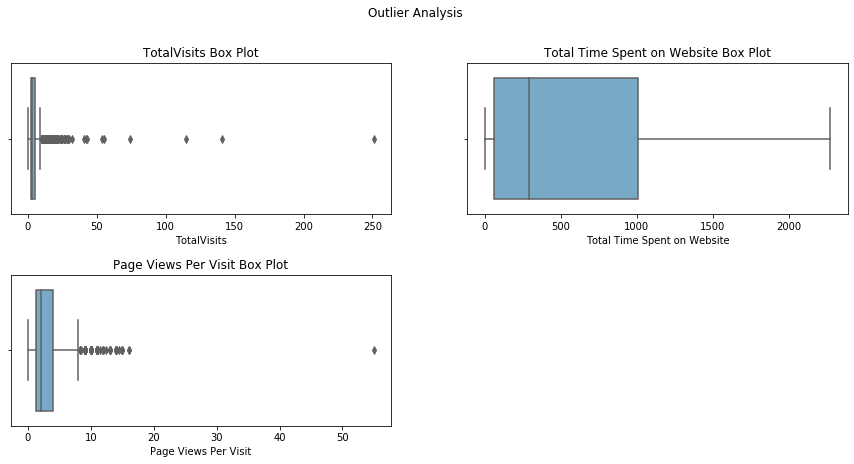

In [25]:
# Function for box plotting
def boxPlotAnalysis(df, cols):
    # Setting parameters for plot
    plt.figure(figsize=(15, 6))
    plt.suptitle("Outlier Analysis")
    plt.subplots_adjust(top = 0.85, bottom=0.01, hspace=0.4, wspace=0.2)
    j = 0
    for i in enumerate(cols):
        # For plotting Box plot
        j = j + 1
        plt.subplot(2, 2, j)
        sns.boxplot(x =df[i[1]], palette="Blues")
        title = i[1] + ' Box Plot'
        # Setting labels
        plt.title(title)
        plt.xlabel(i[1])
    plt.show()
    
# Specifiying columns for outlier analysis
cols_for_outlier = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
print("Displaying the box plots of the features from leads dataframe for Outlier Analysis:\n")
boxPlotAnalysis(leads_df, cols_for_outlier)

In [26]:
print("From the above graphs we could see some outliers in the columns. Lets analyse the outliers statistically.")
cols_to_outlier_test = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
display(leads_df[cols_to_outlier_test].describe(percentiles=[0.25,0.5,0.75,0.9,0.99]))
print("\nFrom the statistical details and box plot we could observe that...")
print("TotalVisits:")
print("- The 'TotalVisits' has many outliers with few extreme outliers on the right side")
print("Total Time Spent on Website:")
print("- The time spent is skewed to the left, but there are not many outliers")
print("Page Views Per Visit:")
print("- We can observe that there are many outliers with one extreme outlier.")

print("\n---------------------------------------------------------------------------------------------------\n")

#Handling outliers
outlier_to_be_handled = ['TotalVisits', 'Page Views Per Visit']
print("From the above analysis we are going to cap: {0}".format(outlier_to_be_handled))
print("So, Capping the outliers for: \n- 'TotalVisits' to 99th percentile value \n- 'Page Views Per Visit' to 95th percentile value")
quantile_vals = [0.94, 0.98]
for i in enumerate(outlier_to_be_handled):
    value = leads_df[i[1]].quantile(quantile_vals[i[0]])
    leads_df[i[1]][leads_df[i[1]]>=value] = value
    
print("\n---------------------------------------------------------------------------------------------------\n")

print("\nOutliers treatment is done. Lets analyse the data after outliers treatment.")
display(leads_df[outlier_to_be_handled].describe(percentiles=[0.25,0.5,0.75,0.9,0.99]))

From the above graphs we could see some outliers in the columns. Lets analyse the outliers statistically.


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7759.000000,7759.000000,7759.000000
mean,3.796237,533.294110,2.611965
std,5.064254,554.539866,2.143379
min,0.000000,0.000000,0.000000
25%,2.000000,61.000000,1.330000
50%,3.000000,295.000000,2.000000
75%,5.000000,1009.000000,4.000000
90%,8.000000,1411.000000,5.000000
99%,18.000000,1846.420000,9.000000
max,251.000000,2272.000000,55.000000



From the statistical details and box plot we could observe that...
TotalVisits:
- The 'TotalVisits' has many outliers with few extreme outliers on the right side
Total Time Spent on Website:
- The time spent is skewed to the left, but there are not many outliers
Page Views Per Visit:
- We can observe that there are many outliers with one extreme outlier.

---------------------------------------------------------------------------------------------------

From the above analysis we are going to cap: ['TotalVisits', 'Page Views Per Visit']
So, Capping the outliers for: 
- 'TotalVisits' to 99th percentile value 
- 'Page Views Per Visit' to 95th percentile value

---------------------------------------------------------------------------------------------------


Outliers treatment is done. Lets analyse the data after outliers treatment.


,TotalVisits,Page Views Per Visit
count,7759.000000,7759.000000
mean,3.442196,2.566164
std,2.616697,1.911128
min,0.000000,0.000000
25%,2.000000,1.330000
50%,3.000000,2.000000
75%,5.000000,4.000000
90%,8.000000,5.000000
99%,9.000000,8.000000
max,9.000000,8.000000


Displaying the box plots of the features from leads dataframe after Outlier Analysis:



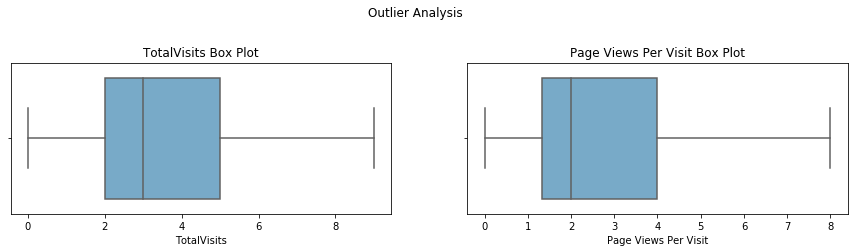

In [27]:
#visualizing data after outliers treatment
print("Displaying the box plots of the features from leads dataframe after Outlier Analysis:\n")
boxPlotAnalysis(leads_df, outlier_to_be_handled)

-  #### Checking the retained rows

In [28]:
# Calculating null percentage of columns
print("Null count and percentage of columns : \n")
display(calcColWiseNullCount(leads_df))

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating number and percentage of rows retained
print("Number and percentage of rows retained after completing all the tasks above :")
print("Number of rows before dropping : {0}".format(leads_df_source.shape[0]))
print("Number of rows retained after dropping : {0}".format(leads_df.shape[0]))
retained_row_perc = (leads_df.shape[0] / leads_df_source.shape[0]) * 100
print("Percentage of retained rows : {0}".format(round(retained_row_perc, 2)))

Null count and percentage of columns : 



,Column-wise Null Count,Column-wise Null Percentage
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0
Last Activity,0,0.0
Specialization,0,0.0



---------------------------------------------------------------------------------------------------

Number and percentage of rows retained after completing all the tasks above :
Number of rows before dropping : 9240
Number of rows retained after dropping : 7759
Percentage of retained rows : 83.97


### Step 4: Visualising the Data
- #### 4.1: Visualising Numeric Variables
- #### 4.2: Visualising Categorical Variables

-  #### 4.1: Visualising Numeric Variables

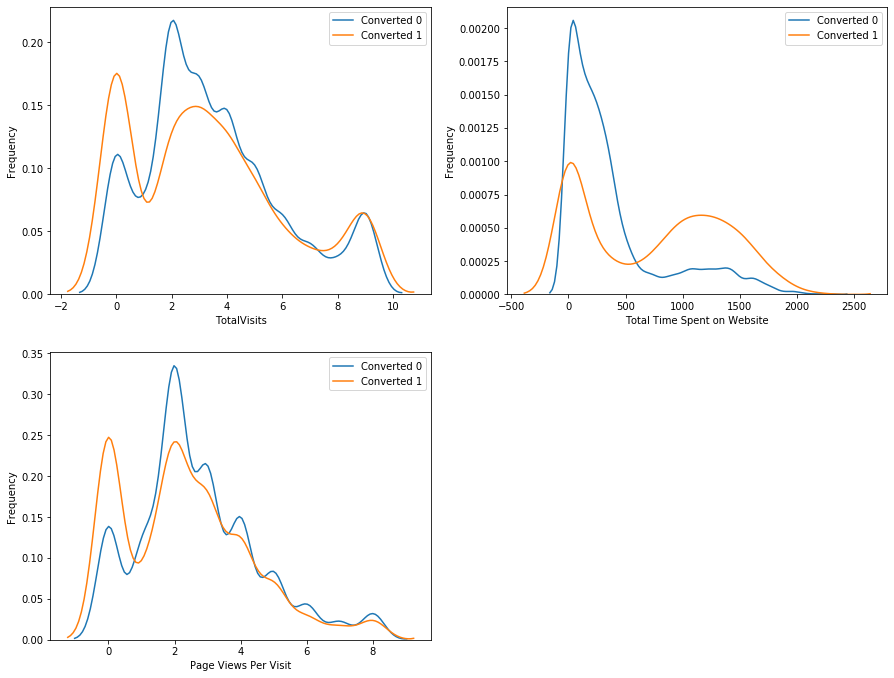

In [29]:
#Splitting the data into 0's & 1's based on Converted feature
leads_df_t0 = leads_df[(leads_df['Converted'] == 0)]
leads_df_t1 = leads_df[(leads_df['Converted'] == 1)]

#Ploting the features of country dataset
plt.figure(figsize=(15, 18))
features = leads_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.distplot(leads_df_t0[i[1]], hist = False, label="Converted 0")
    sns.distplot(leads_df_t1[i[1]], hist = False, label="Converted 1")
    plt.ylabel('Frequency')

### Observations:

#### Total Time Spent on Website:
    - We could infer that people who have spent more time on website has converted.
    - People who have spend less time on website have more chances of not converting into a lead.
 
#### Page Views Per Visit:
    - There is no meaningful insights from this graph because when there is no page visit the conversion is good and when there is 2 page visit the conversion is poor.
    - Conversion frequency remains constant for page visits greater than 3.
   
#### TotalVisits:
    - If the total visits is in the range of 2 to 5, we could see most of them are not converted. 
    - Both converted 0's & 1's follow a similar pattern once the total visits exceeds 5. Hence its not giving significant insights.

-  #### 4.2: Visualising Categorical Variables

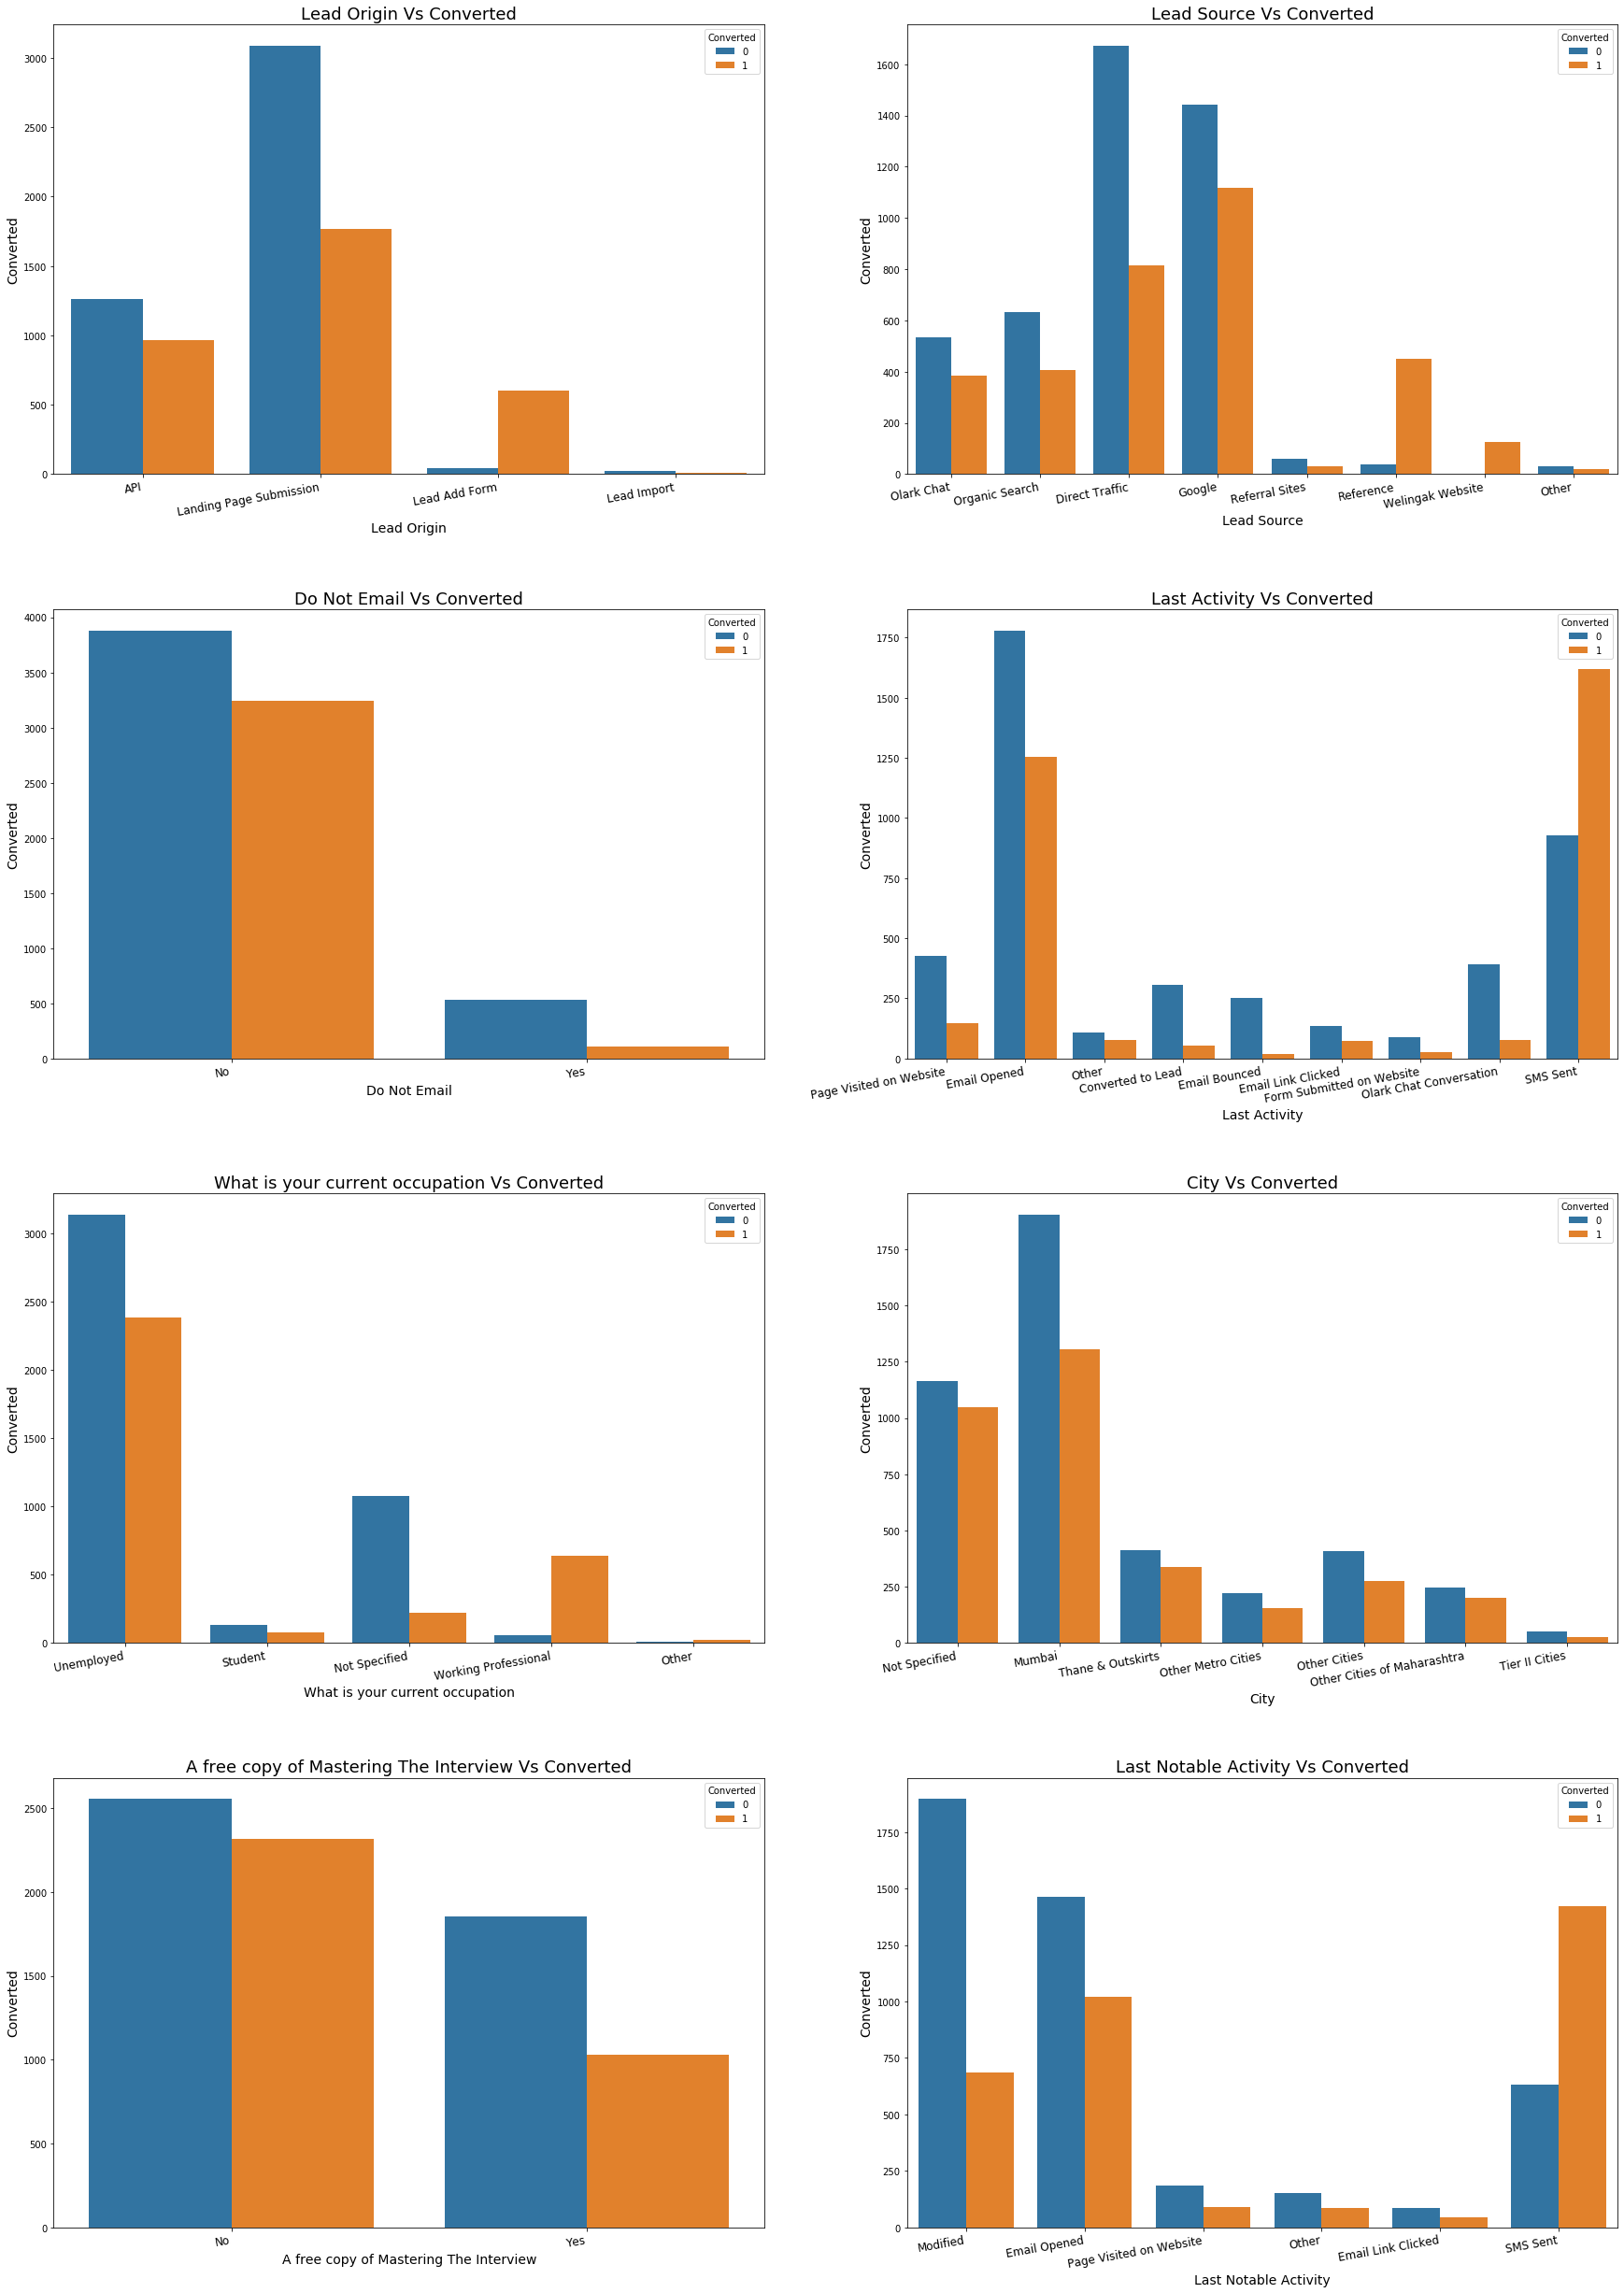

In [30]:
# Visualising categorical variables
features = ['Lead Origin', 'Lead Source',
       'Do Not Email','Last Activity',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Setting optimal figure size so that there is no overlap
plt.figure(figsize=(30, 60))

# Logic for performing univariate analysis for all the shortlisted categorical variables at once
j = 0
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for i in enumerate(features):
     # For plotting Count Distribution
    j = j + 1
    plt.subplot(7, 2, j)
    sns.countplot(x=i[1], hue= 'Converted', data=leads_df)
    title = i[1] + ' Vs Converted'
    # Setting labels
    plt.title(title, fontsize=18)
    plt.xlabel(i[1], fontsize=14)
    plt.ylabel("Converted",fontsize=14)
    plt.xticks(
        rotation=10, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
plt.show()

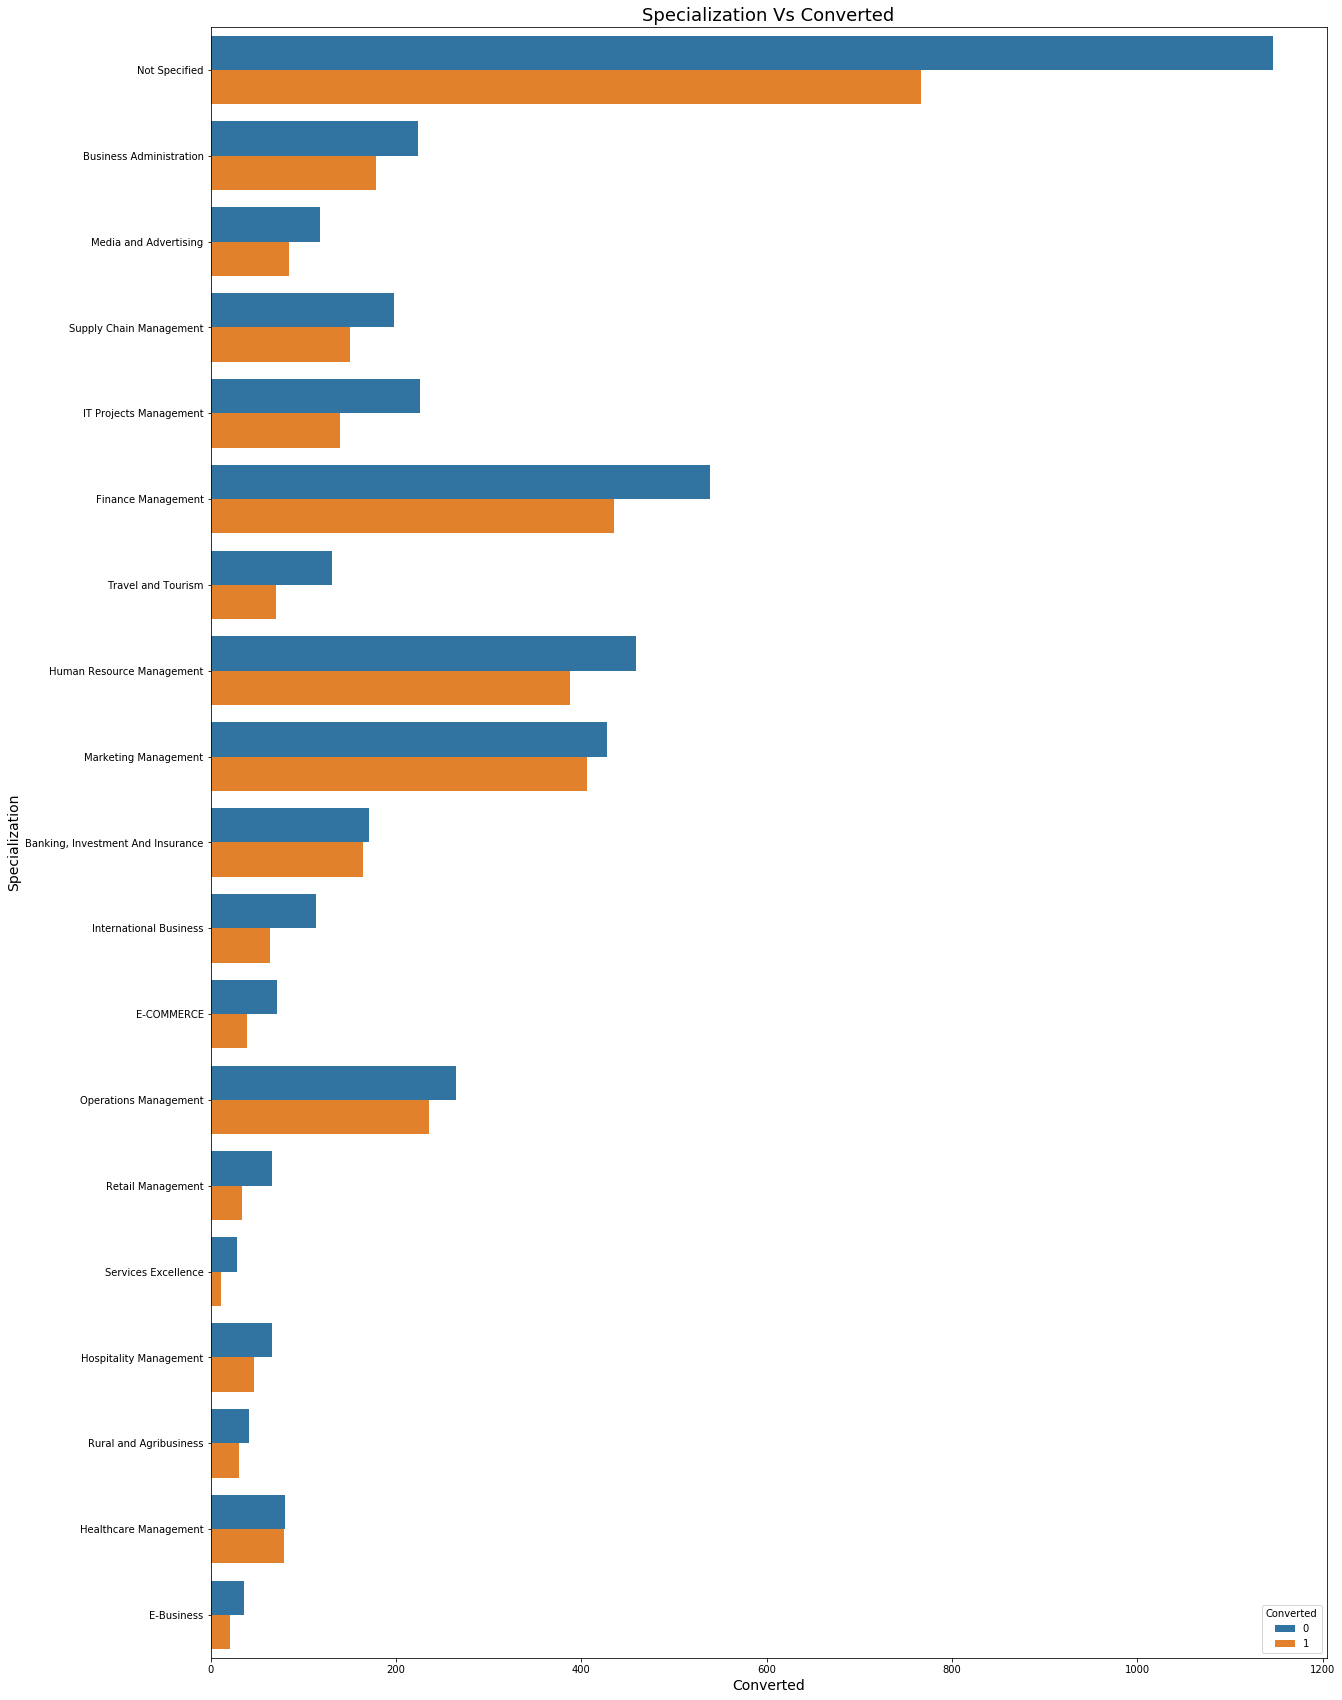

In [31]:
#ploting Specialization
plt.figure(figsize=(20, 30))
sns.countplot(y='Specialization', hue= 'Converted', data=leads_df)
# Setting labels
plt.title('Specialization Vs Converted', fontsize=18)
plt.ylabel('Specialization', fontsize=14)
plt.xlabel('Converted', fontsize=14)
plt.show()

### Observations:
  - #### Lead Origin Vs Converted:
       -  The conversion rate for 'Lead Add Form' is very high when compared to other origins. We could see less no of leads for 'Lead Import' and 'Lead Add Form'. 
       - On the other hand the leads count for 'Landing Page Submission' and 'API' are high but the conversion rate is very low.
       
  - #### Lead Source Vs Converted:
       - Conversion rate for 'Reference' & 'Welingak Website’ is high. Even though they have less inflow they have high conversion rates compared to other channels. 
       - In the remaining, ‘Google’ has good conversion ratio when compared to other source.
       
  - #### Do Not Email Vs Converted:
       - The leads who have said 'No' for emails are more when compare to 'Yes’. 
       - The conversion failure is more when the lead has answered ‘Yes’.

  - #### Last Activity Vs Converted:
       - Leads with Last Activity as SMS sent and Email opened have highest inflow when compare to other activities.
       - The conversion rate for SMS sent is more when compare to that of Email opened.

  - #### What is your current occupation Vs Converted:
       - Working Professionals are those who have high rate of conversion but have less inflow. 
       - We could see more leads under Unemployed but have less conversion rate.
       
  - #### City Vs Converted:
       - We have high inflow from the city 'Mumbai’ and lowest from tier II cities.
       - There is no significant conversion rate in the city feature. 
       
  - #### A free copy of Mastering The Interview Vs Converted:
       - The count of ‘No’ is quite high when compared to ‘Yes’.
       - The conversion rates are better for ‘No’ when compared to the ‘Yes’ category.
       
  - #### Last Notable Activity Vs Converted:
       - Leads with Last Notable Activity as SMS sent, Email opened and Modified have highest inflow. 
       - But the conversion rate for SMS sent is more when compare to that of other activities.

### Step 5: Data Preparation

In [32]:
# Extracting columns which are categorical
categ_cols = leads_df.select_dtypes(include=['object']).columns
print("Columns which needs to converted to dummy variables:")
print(categ_cols)

print('______________________________________________________________________________\n')

# Converting 'Lead Origin', 'What is your current occupation' and 'City' with drop_first

# Set columns to create dummy variables for which drop first is meaningful
cols_drop_first = ['Lead Origin','What is your current occupation', 'City', 'A free copy of Mastering The Interview']

# Get dummies for specified columns
dummy_lead_occup_city = pd.get_dummies(leads_df[cols_drop_first], drop_first=True)

# Concat dummy variables for specified columns
leads_df = pd.concat([leads_df, dummy_lead_occup_city], axis=1)

# Function to create dummy variables with specific column drop
def dummyVarWithSpecDrop(cols_to_dummy, cols_prefix, cols_to_drop):
    # Get dummies for specified columns
    dummy_cols = pd.get_dummies(leads_df[cols_to_dummy], prefix=cols_prefix, drop_first=False)
    # Dropping specified columns
    dummy_cols = dummy_cols.drop(cols_to_drop, axis=1)
    # Concatenating with main dataframe
    return pd.concat([leads_df, dummy_cols], axis=1)
    
# Setting values for dummy variable creation using function    
cols_to_dummy = ['Specialization', 'Lead Source', 'Last Activity', 'Last Notable Activity', 'Do Not Email']
cols_prefix = ['Specialization', 'Lead_Source', 'Last_Activity', 'Last_Notable_Activity', 'Do_Not_Email']
cols_to_drop = ['Specialization_Not Specified', 'Lead_Source_Other', 'Last_Activity_Other', 'Last_Notable_Activity_Other', 'Do_Not_Email_No']
# Calling dummy variable creation
leads_df = dummyVarWithSpecDrop(cols_to_dummy, cols_prefix, cols_to_drop)

# Dropping actual categorical colums for which dummy variables are created
leads_df.drop(categ_cols, axis=1, inplace = True)

# Viewing dataframe after dummy variable creation
print('Viewing dataframe after dummy variable creation:')
display(leads_df.head(5))

print("Viewing the shape of the dataframe: {0}".format(leads_df.shape))

Columns which needs to converted to dummy variables:
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
______________________________________________________________________________

Viewing dataframe after dummy variable creation:


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Do_Not_Email_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Viewing the shape of the dataframe: (7759, 58)


### Step 6: Splitting the Data into Training and Testing Sets

In [33]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Lead Number'], axis=1)
print("Extracting the feature variables alone:")
X.head()

# Putting response variable to y
y = leads_df['Converted']
print("Extracting the response variables alone:")
y.head()

# Splitting the data into Training and Testing Sets using train_test_split from sklearn
# Our train-test ratio split is 70:30.
# We are setting the random seed so that the train and test set always have the same rows.
print("Splitting the data into Training and Testing Sets in the ratio of 70:30...")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print('______________________________________________________________________________\n')

# Examining the number of rows in the splitted sets
print("Viewing the number of rows in the splitted sets.")
print("-Number of rows in the training set: {0}".format(X_train.shape[0]))
print("-Number of rows in the test set: {0}".format(X_test.shape[0]))

Extracting the feature variables alone:
Extracting the response variables alone:
Splitting the data into Training and Testing Sets in the ratio of 70:30...
______________________________________________________________________________

Viewing the number of rows in the splitted sets.
-Number of rows in the training set: 5431
-Number of rows in the test set: 2328


### Step 7: Rescaling the features
- #### 7.1: Rescaling using Standard Scaling
- #### 7.2: Visualizing Correlation

- #### 7.1: Rescaling using Standard Scaling

In [34]:
# We will use Standard Scaling technique to rescale the required features

# Instantiate the standard scaler
scaler = StandardScaler()

# Displaying the dataframe to check which features need scaling
print("Displaying the dataframe to check which features need scaling:")
display(X_train.head(5))

print('______________________________________________________________________________\n')

# Analyzing the dataframe
print("Analyzing the dataframe, we can see that all the numerical columns need scaling:")
cols_to_scale = X_train.select_dtypes(include=['int64', 'float64']).columns
print(list(cols_to_scale))

print('______________________________________________________________________________\n')

# Scaling the selected columns
print("Applying standard scaler to the required columns...")
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

print('______________________________________________________________________________\n')

# Viewing the dataframe after scaling
print("Viewing the dataframe after scaling")
display(X_train.head(5))

Displaying the dataframe to check which features need scaling:


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Do_Not_Email_Yes
4142,7.0,115,3.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
754,6.0,1623,6.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3722,5.0,745,5.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
727,5.0,1313,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4806,5.0,212,5.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


______________________________________________________________________________

Analyzing the dataframe, we can see that all the numerical columns need scaling:
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
______________________________________________________________________________

Applying standard scaler to the required columns...
______________________________________________________________________________

Viewing the dataframe after scaling


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Do_Not_Email_Yes
4142,1.378098,-0.762712,0.495143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
754,0.993827,1.939176,1.808123,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3722,0.609556,0.366061,1.282931,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
727,0.609556,1.383748,-0.030049,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4806,0.609556,-0.588917,1.282931,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


-  #### 7.2: Visualizing Correlation

Visualizing the correlation:


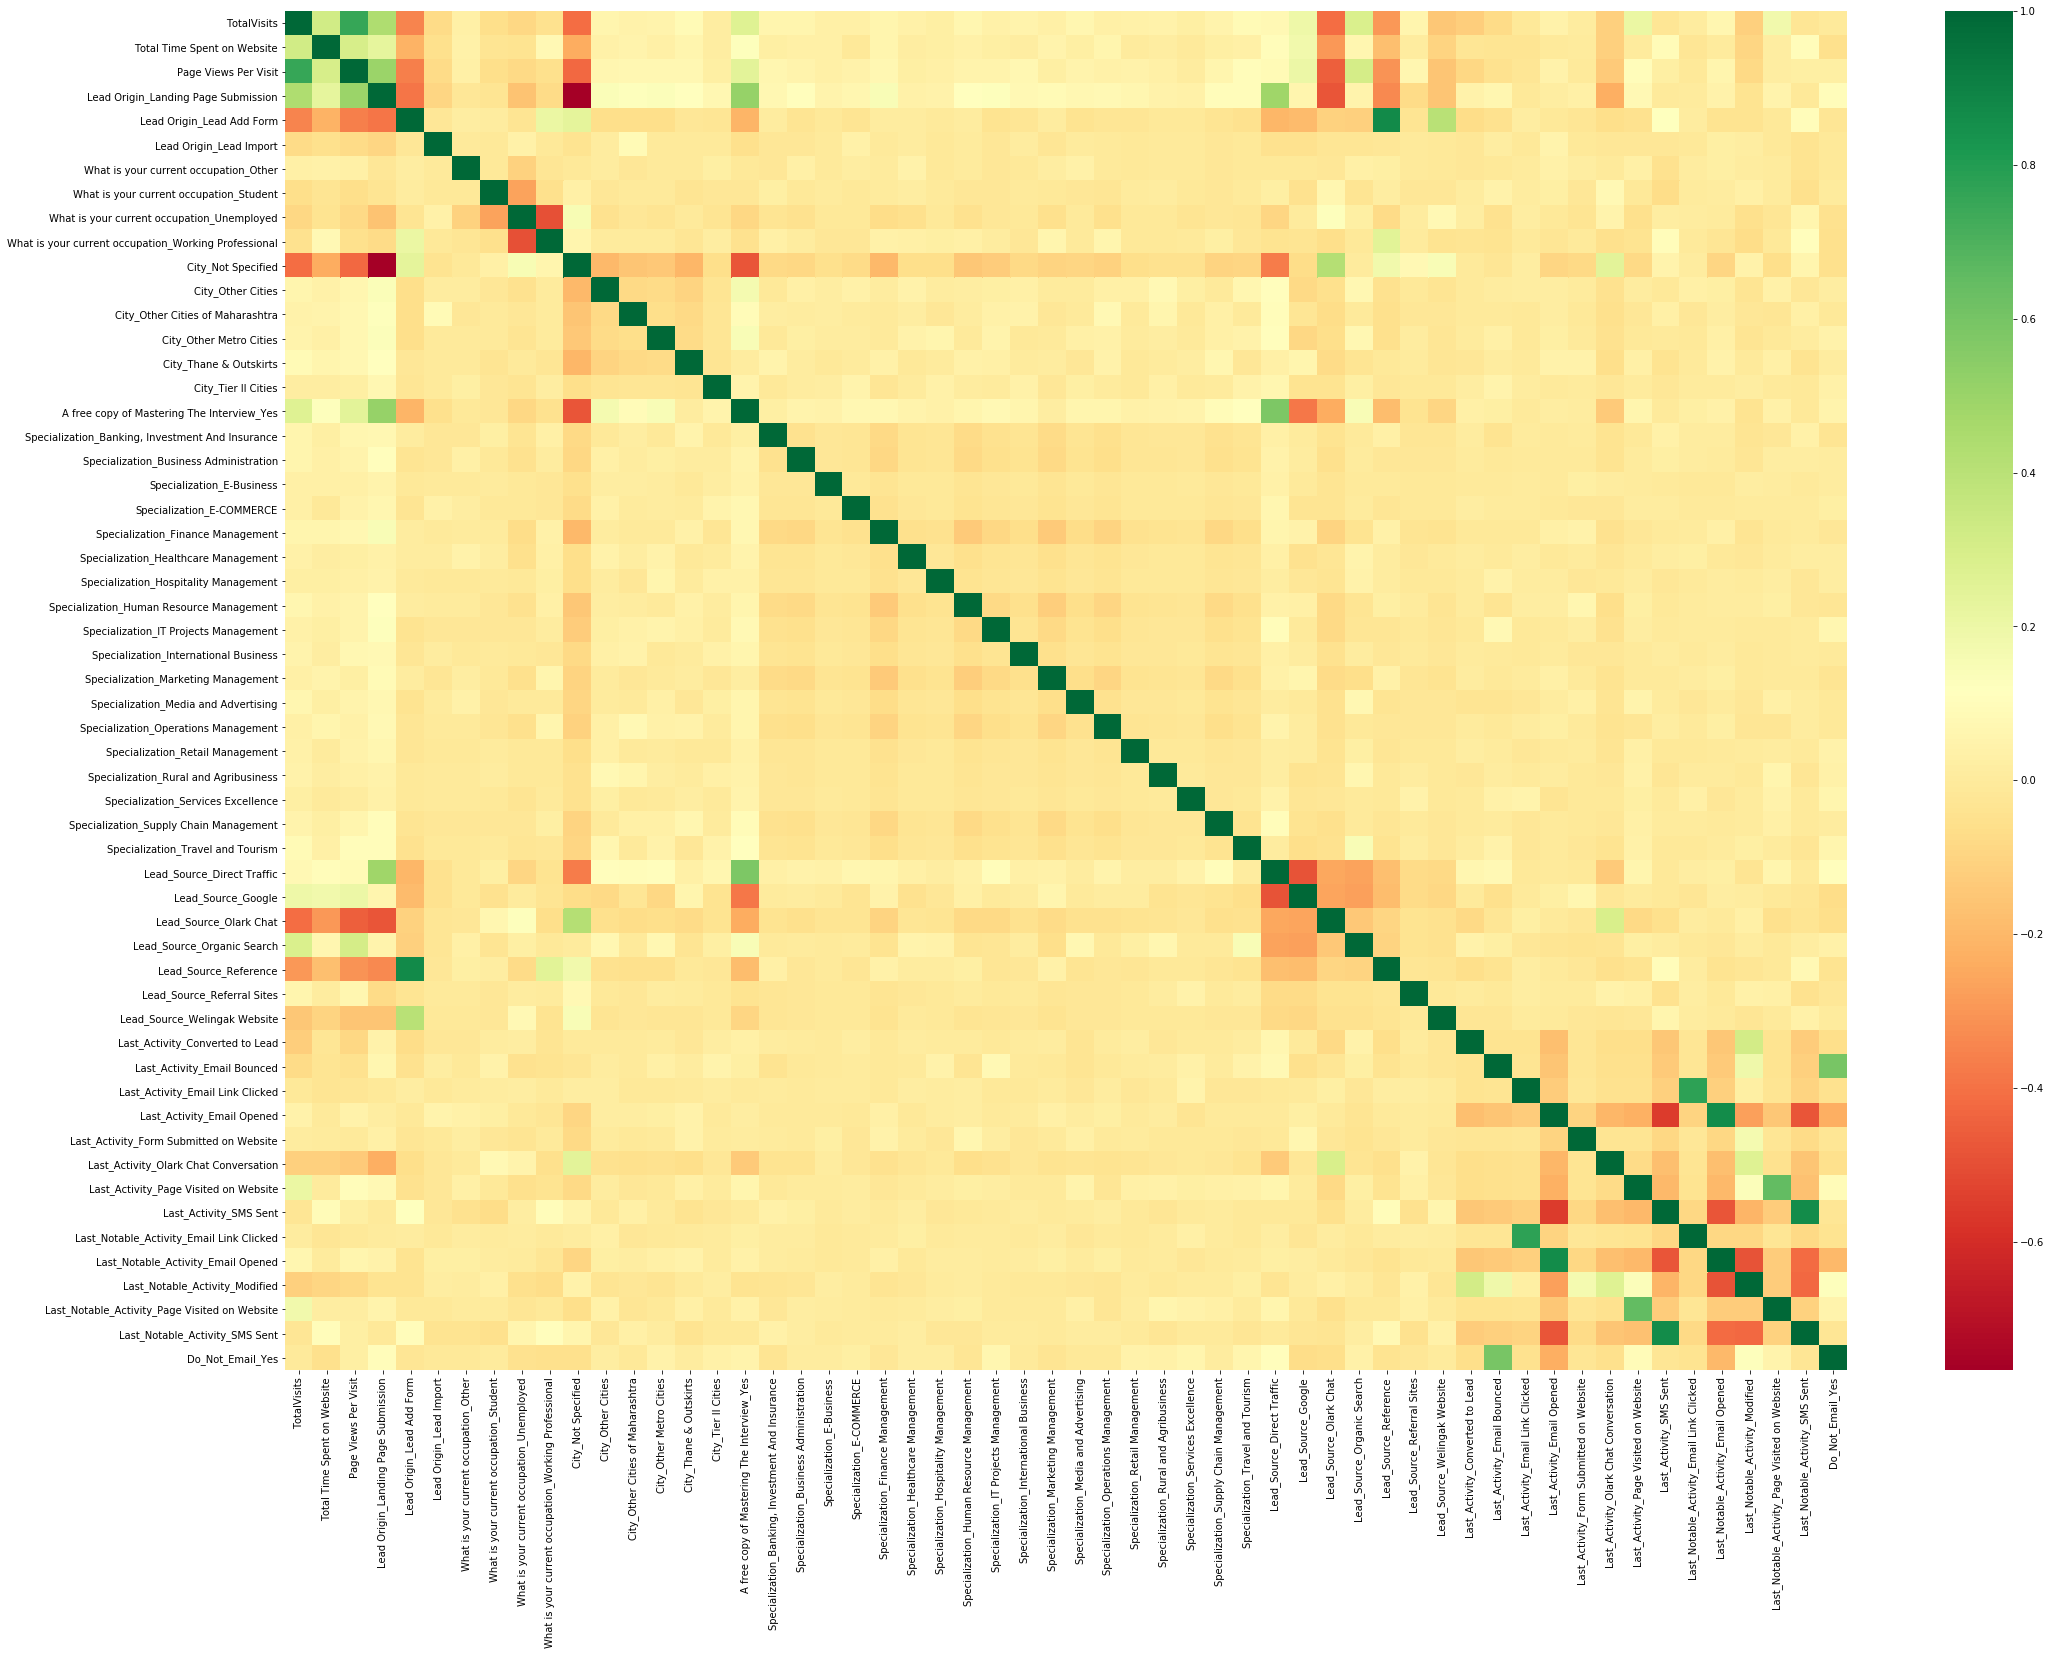

In [35]:
# Visualizing the correlation
print("Visualizing the correlation:")
plt.figure(figsize = (35, 25))
sns.heatmap(X_train.corr(), annot=False, cmap="RdYlGn")
plt.show()

In [36]:
corr_x_train = X_train.corr().unstack().drop_duplicates()
print("Displaying the maximum correlation pairs (< 0.7 and > 0.7):")
display(corr_x_train[((corr_x_train > 0.7) & (corr_x_train < 1)) | ((corr_x_train > -1.0) & (corr_x_train < -0.7))])

print("From the correlation analysis, we can see that there are 6 pairs with very high correlation.")
print("We can drop columns based on this analysis.")

Displaying the maximum correlation pairs (< 0.7 and > 0.7):


TotalVisits                          Page Views Per Visit                        0.754274
Lead Origin_Landing Page Submission  City_Not Specified                         -0.766759
Lead Origin_Lead Add Form            Lead_Source_Reference                       0.870948
Last_Activity_Email Link Clicked     Last_Notable_Activity_Email Link Clicked    0.775897
Last_Activity_Email Opened           Last_Notable_Activity_Email Opened          0.863805
Last_Activity_SMS Sent               Last_Notable_Activity_SMS Sent              0.863256
dtype: float64

From the correlation analysis, we can see that there are 6 pairs with very high correlation.
We can drop columns based on this analysis.


#### Dropping highly correlated dummy variables

From the above analysis, we got 6 features which are highly correlated. They are: 
['Page Views Per Visit', 'City_Not Specified', 'Lead Origin_Lead Add Form', 'Last_Notable_Activity_Email Link Clicked', 'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_SMS Sent']
______________________________________________________________________________

Dropping the columns...
______________________________________________________________________________

Visualizing the correlation after dropping highly correlated variables:


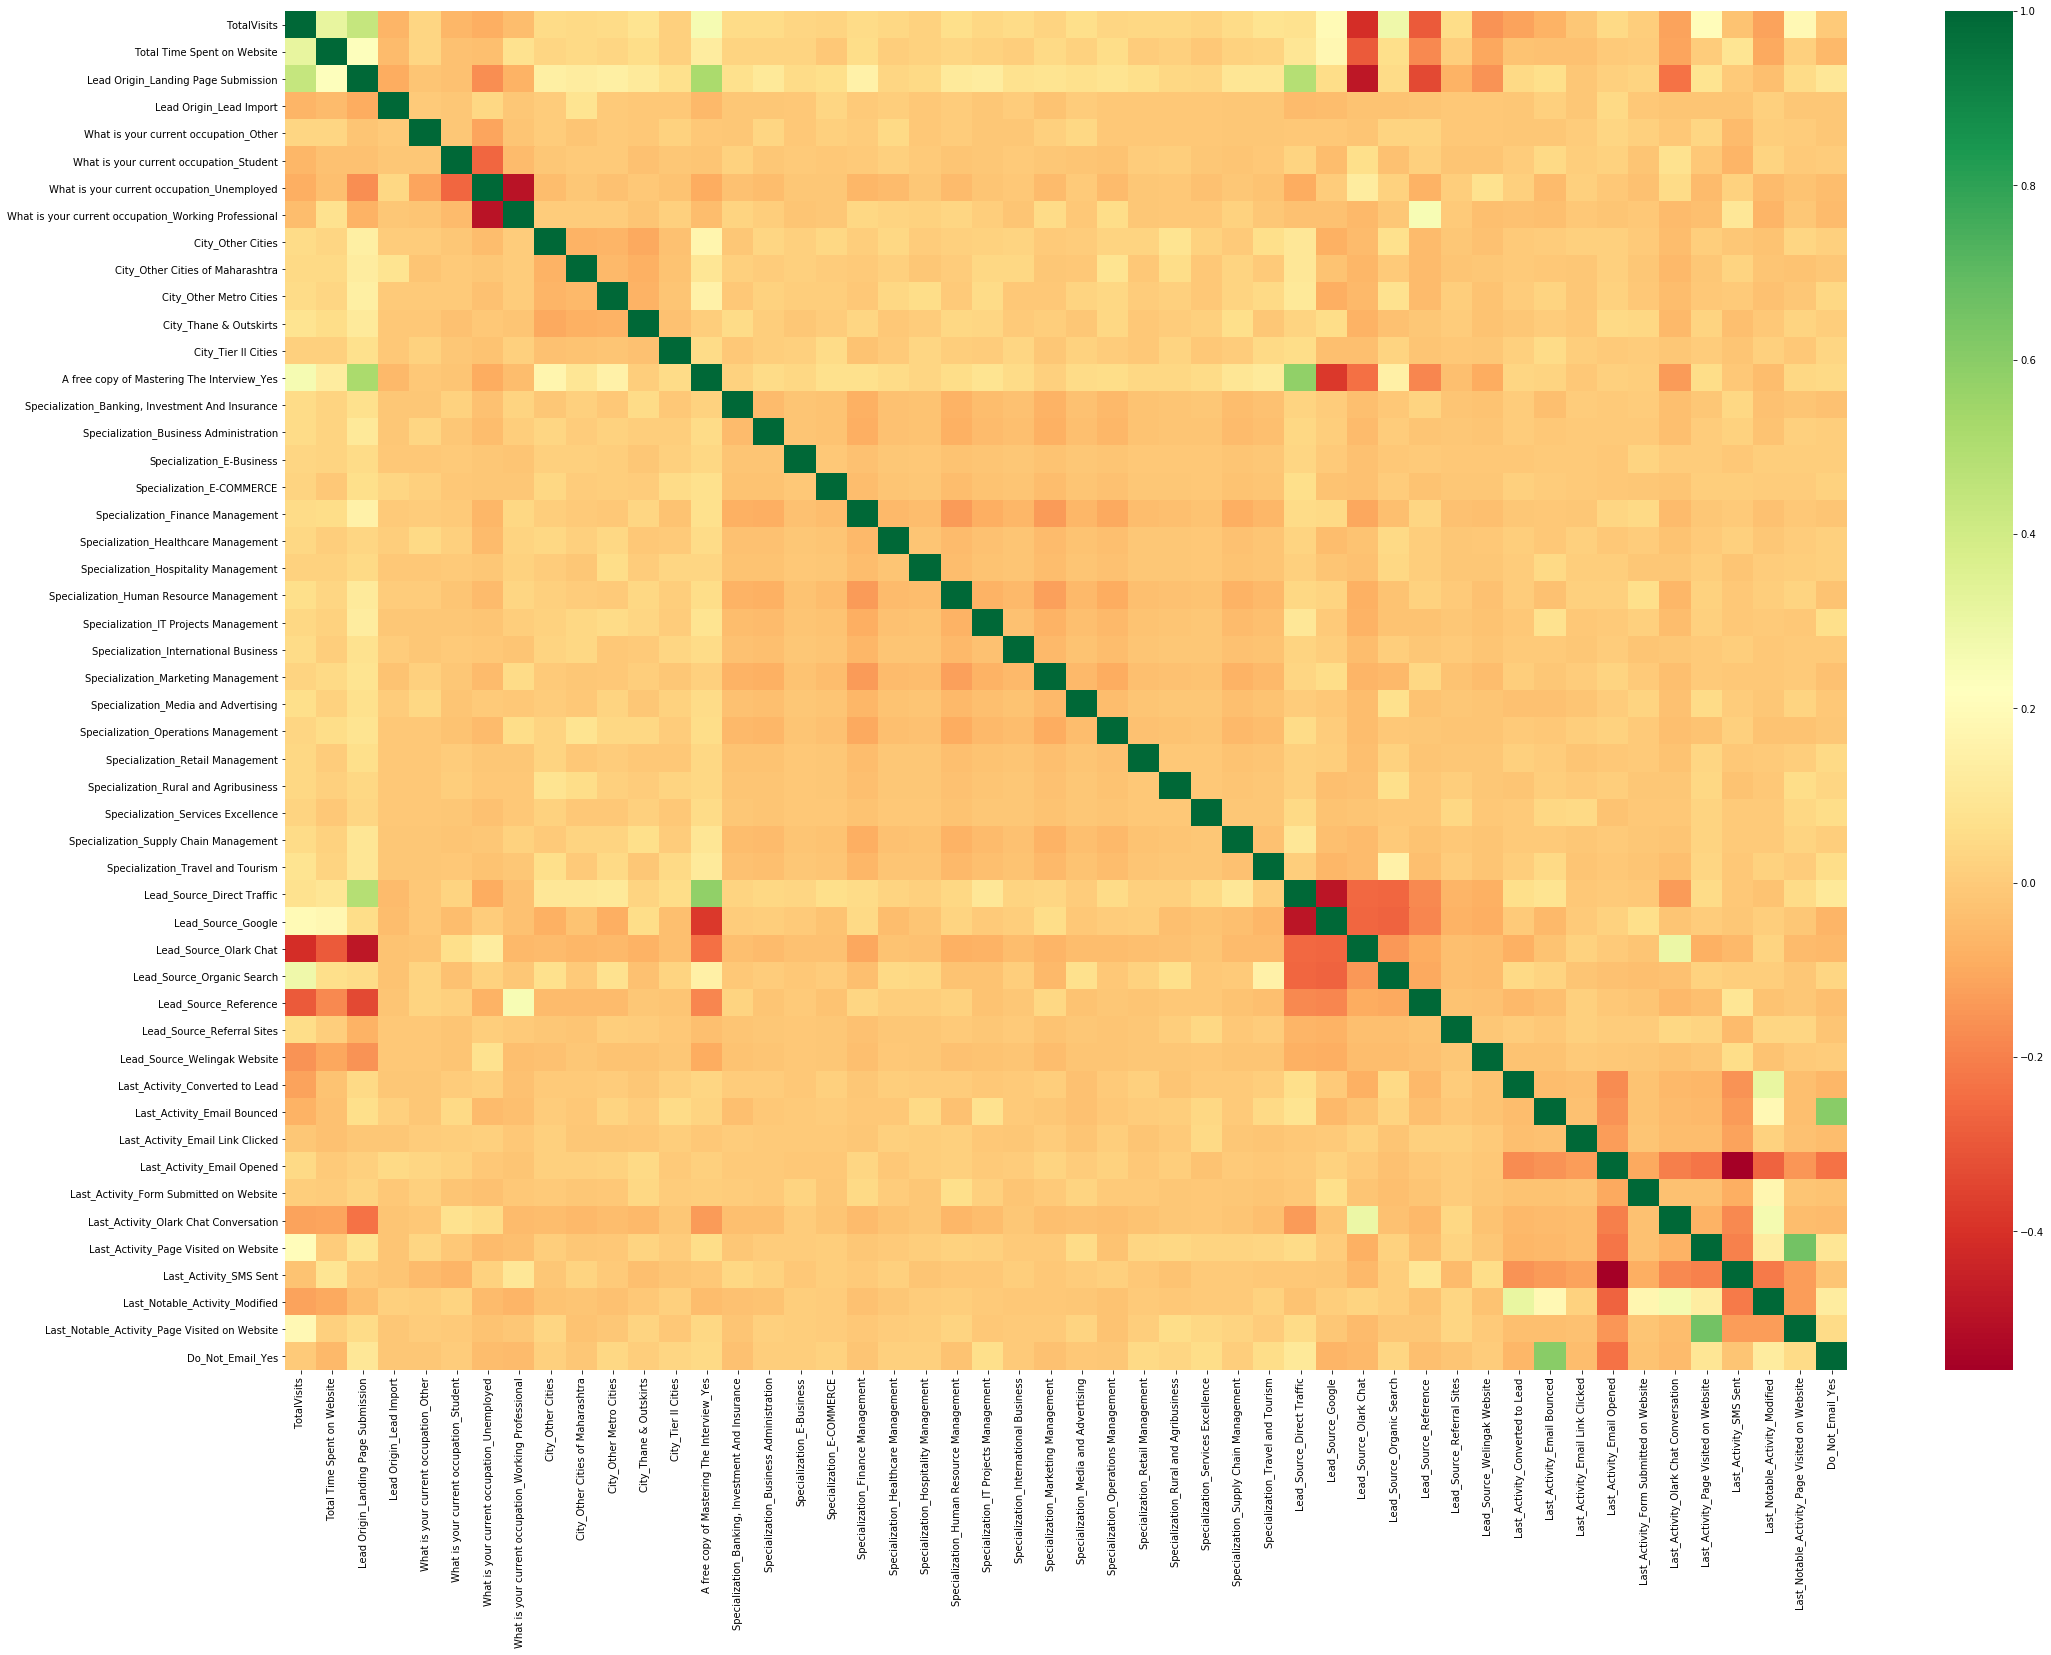

______________________________________________________________________________

The final number of columns in our data set before modelling is: 50


50

In [37]:
# Setting columns to remove due to correlation
cols_to_rem_corr = ['Page Views Per Visit', 'City_Not Specified', 'Lead Origin_Lead Add Form', 
                   'Last_Notable_Activity_Email Link Clicked', 'Last_Notable_Activity_Email Opened', 
                   'Last_Notable_Activity_SMS Sent']
print("From the above analysis, we got 6 features which are highly correlated. They are: \n{0}".format(cols_to_rem_corr))

print('______________________________________________________________________________\n')

# Rescaling without the removed column
# cols_to_scale = cols_to_scale[cols_to_scale != 'Page Views Per Visit']

# Dropping the columns from train data and test data
print("Dropping the columns...")
X_train = X_train.drop(columns=cols_to_rem_corr)
# X_test = X_test.drop(columns=cols_to_rem_corr)

print('______________________________________________________________________________\n')

print("Visualizing the correlation after dropping highly correlated variables:")
plt.figure(figsize = (35, 25))
sns.heatmap(X_train.corr(), annot=False, cmap="RdYlGn")
plt.show()

print('______________________________________________________________________________\n')

print("The final number of columns in our data set before modelling is: {0}".format(len(X_train.columns)))
len(X_train.columns)

### Step 8: Model Building
- #### 8.1: Feature selection using RFE (Recursive Feature Elimination)
- #### 8.2: Building and assesing the model using statsmodel
- #### Rpeat substep 8.2 after insignficant column drop until a best model is obtained
- #### 8.3: Model Evaluation with cut-off at 0.5

-  #### 8.1: Feature selection using RFE (Recursive Feature Elimination)

In [38]:
# Using RFE and LogisticRegression from sklearn
count_rfe_features = 20
print("There are {0} columns in the dataframe from which we need to perform variable selection.".format(len(X_train.columns)))
print("Manual approach will be time consuming for such great numbers.")
print("So we will first perform automated selection using RFE for the top {0} features.".format(count_rfe_features))

print('______________________________________________________________________________\n')

# Fitting the model using logistic regression
print("Fitting the model using logistic regression...")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Performing RFE
print("Running RFE(Recursive Feature Elimination)...")
rfe = RFE(log_reg, count_rfe_features)
rfe = rfe.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Displaying columns selected using RFE
print('Displaying columns selected using RFE:')
cols_selfrom_rfe = X_train.columns[rfe.support_]
display(pd.DataFrame(cols_selfrom_rfe, columns=['RFE Selected Columns']))

There are 50 columns in the dataframe from which we need to perform variable selection.
Manual approach will be time consuming for such great numbers.
So we will first perform automated selection using RFE for the top 20 features.
______________________________________________________________________________

Fitting the model using logistic regression...
______________________________________________________________________________

Running RFE(Recursive Feature Elimination)...
______________________________________________________________________________

Displaying columns selected using RFE:


,RFE Selected Columns
0,Total Time Spent on Website
1,Lead Origin_Landing Page Submission
2,What is your current occupation_Other
3,What is your current occupation_Student
4,What is your current occupation_Unemployed
5,What is your current occupation_Working Profes...
6,"Specialization_Banking, Investment And Insurance"
7,Specialization_E-Business
8,Specialization_Marketing Management
9,Specialization_Rural and Agribusiness


-  #### 8.2: Building and assesing the model using statsmodel

In [39]:
# Function to predict and return the prediction
def predAndReturnDf(log_reg, X_train_sm):
    # Predicting values on the train set
    y_train_pred_prob = log_reg.predict(X_train_sm)

    # Reshaping
    y_train_pred_prob = y_train_pred_prob.values.reshape(-1)

    # Creating a dataframe with the lead 'Converted' and the predicted probabilities
    y_train_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred_prob})
    y_train_pred['ID'] = y_train.index

    # Creating new column 'Predicted_point5' with cut-off 0.5
    y_train_pred['Predicted_point5'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    
    return y_train_pred

In [40]:
def findAccSensForGivenModel(log_reg, X_train_sm):
    # Function call for prediction
    y_train_pred = predAndReturnDf(log_reg, X_train_sm)
    
    # Let's check the overall accuracy.
    accuracy =  metrics.accuracy_score(y_train_pred.Converted, y_train_pred.Predicted_point5)

    #confusion_matrix
    confusion2 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.Predicted_point5)
    #true positive 
    TP = confusion2[1,1]
    #true negatives
    TN = confusion2[0,0]
    #false positives
    FP = confusion2[0,1]
    #false negatives
    FN = confusion2[1,0]
    
    #sensitivity_calculation
    sensitivity = TP / float(TP+FN)
    
    return accuracy, sensitivity

In [41]:
# Defining a common function for calculating model parameters and VIF (Variance Inflation Factor)
def modelDetBasedOnCols(cols_for_model):
    
    # Adding Constant
    X_train_sm = sm.add_constant(X_train[cols_for_model])
    
    # Create a fitted model
    log_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
    
    # Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols_for_model].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols_for_model].values, i) for i in range(X_train[cols_for_model].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Find metrics of model
    metric_to_pass = findAccSensForGivenModel(log_reg, X_train_sm)
    
    # Return Model, VIF, X_train_sm and metrics
    return log_reg, vif, X_train_sm, metric_to_pass

In [42]:
# Running first model with all shortlisted features from RFE
print("Running the first model  with all shortlisted features from RFE: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_selfrom_rfe)

# Displaying the summary of the linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- We can see that the 'Lead Origin_Landing Page Submission' feature has a VIF which is greater.")
print("- So, let's drop this variable.")

Running the first model  with all shortlisted features from RFE: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5410
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.9
Date:                Mon, 07 Sep 2020   Deviance:                       4733.7
Time:                        00:45:21   Pearson chi2:                 5.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|   

,Features,VIF
1,Lead Origin_Landing Page Submission,5.77
10,Lead_Source_Direct Traffic,5.13
11,Lead_Source_Google,3.85
4,What is your current occupation_Unemployed,3.39
12,Lead_Source_Organic Search,2.18
18,Last_Notable_Activity_Modified,1.66
17,Last_Activity_SMS Sent,1.58
5,What is your current occupation_Working Profes...,1.45
13,Lead_Source_Reference,1.43
16,Last_Activity_Olark Chat Conversation,1.25


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8026146197753636
The sensitivity for the built model considering cut-off as 0.5: 0.7227638830012717
______________________________________________________________________________

Analysing the logistic regression model and VIF
- We can see that the 'Lead Origin_Landing Page Submission' feature has a VIF which is greater.
- So, let's drop this variable.


- #### Rpeat substep 8.2 after insignficant column drop until a best model is obtained

In [43]:
cols_incl = cols_selfrom_rfe.drop('Lead Origin_Landing Page Submission', 1)

# Running second model
print("Running the second model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The p-value for 'Specialization_E-Business' is high (0.407).")
print("- So, let's drop this variable.")

Running the second model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5411
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.3
Date:                Mon, 07 Sep 2020   Deviance:                       4744.5
Time:                        00:45:21   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------

,Features,VIF
3,What is your current occupation_Unemployed,3.35
10,Lead_Source_Google,2.27
9,Lead_Source_Direct Traffic,2.17
17,Last_Notable_Activity_Modified,1.66
16,Last_Activity_SMS Sent,1.58
11,Lead_Source_Organic Search,1.52
4,What is your current occupation_Working Profes...,1.45
12,Lead_Source_Reference,1.43
15,Last_Activity_Olark Chat Conversation,1.25
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8018781071625851
The sensitivity for the built model considering cut-off as 0.5: 0.7223399745654938
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The p-value for 'Specialization_E-Business' is high (0.407).
- So, let's drop this variable.


In [44]:
cols_incl = cols_incl.drop('Specialization_E-Business', 1)

# Running third model
print("Running the third model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The p-value for 'Specialization_Rural and Agribusiness' is high (0.154).")
print("- So, let's drop this variable.")

Running the third model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5412
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.7
Date:                Mon, 07 Sep 2020   Deviance:                       4745.4
Time:                        00:45:21   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------

,Features,VIF
3,What is your current occupation_Unemployed,3.35
9,Lead_Source_Google,2.26
8,Lead_Source_Direct Traffic,2.16
16,Last_Notable_Activity_Modified,1.66
15,Last_Activity_SMS Sent,1.58
10,Lead_Source_Organic Search,1.52
4,What is your current occupation_Working Profes...,1.45
11,Lead_Source_Reference,1.43
14,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8016939790093905
The sensitivity for the built model considering cut-off as 0.5: 0.7219160661297159
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The p-value for 'Specialization_Rural and Agribusiness' is high (0.154).
- So, let's drop this variable.


In [45]:
cols_incl = cols_incl.drop('Specialization_Rural and Agribusiness', 1)

# Running fourth model
print("Running the fourth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The p-value for 'Specialization_Banking, Investment And Insurance' is high (0.018).")
print("- Eventhough, its lesser than 0.05, we can still choose to drop it as the coefficient is also less.")
print("- So, let's drop this variable.")

Running the fourth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5413
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2373.8
Date:                Mon, 07 Sep 2020   Deviance:                       4747.7
Time:                        00:45:21   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------

,Features,VIF
3,What is your current occupation_Unemployed,3.35
8,Lead_Source_Google,2.26
7,Lead_Source_Direct Traffic,2.15
15,Last_Notable_Activity_Modified,1.66
14,Last_Activity_SMS Sent,1.58
9,Lead_Source_Organic Search,1.51
4,What is your current occupation_Working Profes...,1.45
10,Lead_Source_Reference,1.43
13,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8013257227030013
The sensitivity for the built model considering cut-off as 0.5: 0.7219160661297159
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The p-value for 'Specialization_Banking, Investment And Insurance' is high (0.018).
- Eventhough, its lesser than 0.05, we can still choose to drop it as the coefficient is also less.
- So, let's drop this variable.


In [46]:
cols_incl = cols_incl.drop('Specialization_Banking, Investment And Insurance', 1)

# Running fifth model
print("Running the fifth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The p-value for 'Specialization_Marketing Management' is high (0.010).")
print("- Eventhough, its lesser than 0.05, we can still choose to drop it as the coefficient is also less.")
print("- So, let's drop this variable.")

Running the fifth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5414
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2376.3
Date:                Mon, 07 Sep 2020   Deviance:                       4752.6
Time:                        00:45:22   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------

,Features,VIF
3,What is your current occupation_Unemployed,3.35
7,Lead_Source_Google,2.25
6,Lead_Source_Direct Traffic,2.13
14,Last_Notable_Activity_Modified,1.66
13,Last_Activity_SMS Sent,1.58
8,Lead_Source_Organic Search,1.51
4,What is your current occupation_Working Profes...,1.44
9,Lead_Source_Reference,1.42
12,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8024304916221691
The sensitivity for the built model considering cut-off as 0.5: 0.7231877914370496
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The p-value for 'Specialization_Marketing Management' is high (0.010).
- Eventhough, its lesser than 0.05, we can still choose to drop it as the coefficient is also less.
- So, let's drop this variable.


In [47]:
cols_incl = cols_incl.drop('Specialization_Marketing Management', 1)

# Running sixth model
print("Running the sixth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("- The count of values for the 'Lead_Source_Referral Sites' is less.")
print("- It will not have much impact on sensitivity. So, let's drop this variable.")

Running the sixth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5415
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2379.2
Date:                Mon, 07 Sep 2020   Deviance:                       4758.3
Time:                        00:45:22   Pearson chi2:                 5.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------

,Features,VIF
3,What is your current occupation_Unemployed,3.35
6,Lead_Source_Google,2.20
5,Lead_Source_Direct Traffic,2.09
13,Last_Notable_Activity_Modified,1.66
12,Last_Activity_SMS Sent,1.58
7,Lead_Source_Organic Search,1.51
4,What is your current occupation_Working Profes...,1.44
8,Lead_Source_Reference,1.41
11,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8018781071625851
The sensitivity for the built model considering cut-off as 0.5: 0.7206443408223824
______________________________________________________________________________

- The count of values for the 'Lead_Source_Referral Sites' is less.
- It will not have much impact on sensitivity. So, let's drop this variable.


In [48]:
cols_incl = cols_incl.drop('Lead_Source_Referral Sites', 1)

# Running seventh model
print("Running the seventh model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The count of values for the 'What is your current occupation_Other' is less.")
print("- It will not have much impact on sensitivity. So, let's drop this variable.")

Running the seventh model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5416
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.1
Date:                Mon, 07 Sep 2020   Deviance:                       4776.1
Time:                        00:45:22   Pearson chi2:                 5.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------

,Features,VIF
3,What is your current occupation_Unemployed,3.27
6,Lead_Source_Google,2.16
5,Lead_Source_Direct Traffic,2.05
12,Last_Notable_Activity_Modified,1.64
11,Last_Activity_SMS Sent,1.58
7,Lead_Source_Organic Search,1.49
4,What is your current occupation_Working Profes...,1.43
8,Lead_Source_Reference,1.41
10,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8018781071625851
The sensitivity for the built model considering cut-off as 0.5: 0.7227638830012717
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The count of values for the 'What is your current occupation_Other' is less.
- It will not have much impact on sensitivity. So, let's drop this variable.


In [49]:
cols_incl = cols_incl.drop('What is your current occupation_Other', 1)

# Running eigth model
print("Running the eigth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The count of values for the 'What is your current occupation_Student' is less.")
print("- It will not have much impact on sensitivity. So, let's drop this variable.")

Running the eigth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5417
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2402.5
Date:                Mon, 07 Sep 2020   Deviance:                       4804.9
Time:                        00:45:22   Pearson chi2:                 5.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------

,Features,VIF
2,What is your current occupation_Unemployed,3.24
5,Lead_Source_Google,2.14
4,Lead_Source_Direct Traffic,2.04
11,Last_Notable_Activity_Modified,1.64
10,Last_Activity_SMS Sent,1.58
6,Lead_Source_Organic Search,1.48
3,What is your current occupation_Working Profes...,1.42
7,Lead_Source_Reference,1.39
9,Last_Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.16


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8007733382434175
The sensitivity for the built model considering cut-off as 0.5: 0.7219160661297159
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The count of values for the 'What is your current occupation_Student' is less.
- It will not have much impact on sensitivity. So, let's drop this variable.


In [50]:
cols_incl = cols_incl.drop('What is your current occupation_Student', 1)

# Running ninth model
print("Running the ninth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- We could not find any more features to be dropped from this model.")
print("- If we drop, then the sensitivity of the model might be affected.")
print("- So let's proceed with model evaluation.")

Running the ninth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5431
Model:                            GLM   Df Residuals:                     5418
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.6
Date:                Mon, 07 Sep 2020   Deviance:                       4823.1
Time:                        00:45:22   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------

,Features,VIF
1,What is your current occupation_Unemployed,3.08
4,Lead_Source_Google,2.08
3,Lead_Source_Direct Traffic,1.95
10,Last_Notable_Activity_Modified,1.64
9,Last_Activity_SMS Sent,1.58
5,Lead_Source_Organic Search,1.45
2,What is your current occupation_Working Profes...,1.40
6,Lead_Source_Reference,1.37
8,Last_Activity_Olark Chat Conversation,1.22
0,Total Time Spent on Website,1.15


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.7993003130178604
The sensitivity for the built model considering cut-off as 0.5: 0.7189487070792708
______________________________________________________________________________

Analysing the logistic regression model and VIF
- We could not find any more features to be dropped from this model.
- If we drop, then the sensitivity of the model might be affected.
- So let's proceed with model evaluation.


-  #### 8.3: Model Evaluation with cut-off at 0.5

In [51]:
# Function to draw ROC Curve
def draw_roc(actual, probs):

    # Using ROC curve from metrics
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    # Setting parameters for figure
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Setting labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [52]:
# Function to calculate metrics
def metricsCalculation(actual, predicted):
    
    #accuracy_calculation
    accuracy_score = metrics.accuracy_score(actual, predicted)
    
    #confusion_matrix
    confusion2 = metrics.confusion_matrix(actual, predicted)
    #true positive 
    TP = confusion2[1,1]
    #true negatives
    TN = confusion2[0,0]
    #false positives
    FP = confusion2[0,1]
    #false negatives
    FN = confusion2[1,0]
    
    #sensitivity_calculation
    sensitivity = TP / float(TP+FN)
    
    #specificity_calculation
    specificity = TN / float(TN+FP)
    
    #precision_calculation
    precision = TP / (TP + FP)
    
    # Returning dataframe which has all the required metrics
    desc_name = ["Accuracy", "Sensitivity or Recall", "Specificity", "Precision"]
    score_values = [accuracy_score, sensitivity, specificity, precision]
    
    return pd.DataFrame({'Description': desc_name, 'Value': score_values})

Displaying the metrics for the final model with 0.5 cut-off:


,Description,Value
0,Accuracy,0.799300
1,Sensitivity or Recall,0.718949
2,Specificity,0.861003
3,Precision,0.798870


______________________________________________________________________________

Viewing the ROC curve for the final model with 0.5 cut-off


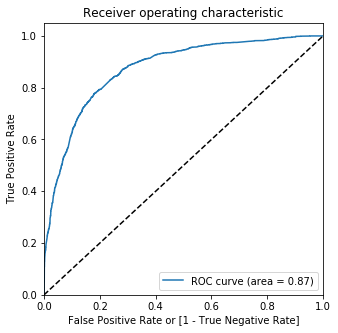

Observation:
We have got a ROC curve area of 0.87 which is a good score for a model.


In [53]:
# Predicting with cutoff as 0.5
y_train_pred = predAndReturnDf(log_reg, X_train_sm)

print("Displaying the metrics for the final model with 0.5 cut-off:")
metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred.Predicted_point5)
display(metrics_df)

print('______________________________________________________________________________\n')

print("Viewing the ROC curve for the final model with 0.5 cut-off")
draw_roc(y_train_pred.Converted, y_train_pred.Converted_Prob)

print("Observation:")
print("We have got a ROC curve area of 0.87 which is a good score for a model.")

### Step 9: Finding Optimal Cut-off point

In [54]:
# Making predictions with different values of probability cut-offs
print("Making predictions with different values of probability cut-offs...\n")
cut_off_list = [float(i)/10 for i in range(10)]

# Looping over different cut-offs
for cut_off in cut_off_list:
    y_train_pred[cut_off]= y_train_pred.Converted_Prob.map(lambda x: 1 if x > cut_off else 0)
    
print("Displaying the dataframe:")
display(y_train_pred.head(5))

Making predictions with different values of probability cut-offs...

Displaying the dataframe:


,Converted,Converted_Prob,ID,Predicted_point5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.198162,4142,0,1,1,0,0,0,0,0,0,0,0
1,0,0.697001,754,1,1,1,1,1,1,1,1,0,0,0
2,1,0.599666,3722,1,1,1,1,1,1,1,0,0,0,0
3,1,0.731171,727,1,1,1,1,1,1,1,1,1,0,0
4,0,0.230831,4806,0,1,1,1,0,0,0,0,0,0,0


In [55]:
# Now let's calculate metrics for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob', 'Accuracy', 'Sensitivity or Recall','Specificity','Precision'])
for i in cut_off_list:
    metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred[i])
    cutoff_df.loc[i] =[i, 
                       metrics_df[metrics_df['Description'] == 'Accuracy']['Value'][0],
                       metrics_df[metrics_df['Description'] == 'Sensitivity or Recall']['Value'][1],
                       metrics_df[metrics_df['Description'] == 'Specificity']['Value'][2],
                       metrics_df[metrics_df['Description'] == 'Precision']['Value'][3]]
    
print("Displaying the metrics for different values of probability cutoffs")
display(cutoff_df)

Displaying the metrics for different values of probability cutoffs


,prob,Accuracy,Sensitivity or Recall,Specificity,Precision
0.0,0.0,0.434358,1.000000,0.000000,0.434358
0.1,0.1,0.574664,0.979228,0.263997,0.505360
0.2,0.2,0.718836,0.935142,0.552734,0.616201
0.3,0.3,0.779046,0.880458,0.701172,0.693489
0.4,0.4,0.797091,0.793133,0.800130,0.752918
0.5,0.5,0.799300,0.718949,0.861003,0.798870
0.6,0.6,0.785491,0.640526,0.896810,0.826586
0.7,0.7,0.752348,0.516320,0.933594,0.856540
0.8,0.8,0.723808,0.417974,0.958659,0.885894
0.9,0.9,0.669122,0.262823,0.981120,0.914454


Plotting accuracy, sensitivity and specificity for various probability cut-offs:


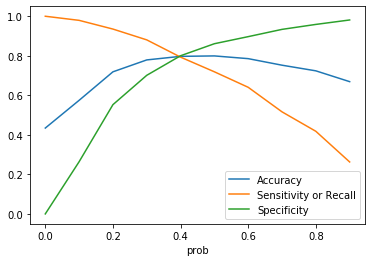

Observation:
- We can see that the optimum cut-off point where all the metrics (accuracy, sensitivit and specificity) 
	are common is approximately at ~0.39.
- At the optimal cut-off point all the metrics are having a value around ~0.8.


In [56]:
# Let's plot accuracy, sensitivity and specificity for various probability cut-offs.
print("Plotting accuracy, sensitivity and specificity for various probability cut-offs:")
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity or Recall','Specificity'])
plt.show()

print("Observation:")
print("- We can see that the optimum cut-off point where all the metrics (accuracy, sensitivit and specificity) \n\tare common is approximately at ~0.39.")
print("- At the optimal cut-off point all the metrics are having a value around ~0.8.")

In [57]:
# Setting optimal cutoff
optimal_cutoff = 0.39

y_train_pred['Lead Number'] = list(leads_df.loc[y_train_pred.ID]["Lead Number"])
y_train_pred['Lead Score'] = round((y_train_pred['Converted_Prob']*100), 2)
# Predicting values based on optimum
y_train_pred['prediction_optim'] = y_train_pred.Converted_Prob.map( lambda x: 1 if x > optimal_cutoff else 0)

# Predicting the "Converted" based on the optimal cut-off point
print("Predicting the 'Converted' based on the optimal cut-off point:")
display(y_train_pred[["Lead Number", "Converted", "Converted_Prob", "Lead Score", "prediction_optim"]].head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the final model with optimal cut-off point")
metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred.prediction_optim)
metrics_df

Predicting the 'Converted' based on the optimal cut-off point:


,Lead Number,Converted,Converted_Prob,Lead Score,prediction_optim
0,620255,0,0.198162,19.82,0
1,652646,0,0.697001,69.70,1
2,624438,1,0.599666,59.97,1
3,652926,1,0.731171,73.12,1
4,613861,0,0.230831,23.08,0


______________________________________________________________________________

Displaying the metrics for the final model with optimal cut-off point


,Description,Value
0,Accuracy,0.791751
1,Sensitivity or Recall,0.830861
2,Specificity,0.761719
3,Precision,0.728083


### Step 10: Making Predictions Using the Final Model
- #### 10.1: Applying the scaling on the test sets
- #### 10.2: Making Predictions

- #### 10.1: Applying the scaling on the test sets

In [58]:
# Applying Scaling

print("Applying scaling to the test set.")
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Selecting the columns in final model
cols_in_model = X_train_sm.columns[X_train_sm.columns != 'const']
X_test = X_test[cols_in_model]

Applying scaling to the test set.


- #### 10.2: Making Predictions

In [59]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = log_reg.predict(X_test_sm)

# Converting the prediction to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.rename(columns={ 0 : 'Convertion Probability'}, inplace=True)
y_test_pred_df['Lead Score'] = round((y_test_pred_df['Convertion Probability'] * 100), 2)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number in the 
y_test_df['Lead Number'] = leads_df.loc[list(y_test.index)]['Lead Number']

# Resetting index for both the dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df[["Lead Number", "Converted"]], y_test_pred_df], axis=1) 

print("Displaying the predicted lead scores for test data:")
y_pred_final.head()

Displaying the predicted lead scores for test data:


,Lead Number,Converted,Convertion Probability,Lead Score
0,629118,1,0.465601,46.56
1,590847,0,0.141826,14.18
2,603289,1,0.897911,89.79
3,620695,0,0.146856,14.69
4,651545,0,0.096041,9.60


In [60]:
# Applying cutoff for getting final convertion states
y_pred_final['Final_predicted_opt'] = y_pred_final['Convertion Probability'].map(lambda x: 1 if x > optimal_cutoff else 0)

print("Displaying dataframe after final predicitons using optimal cut-off on test data:")
y_pred_final.head()

Displaying dataframe after final predicitons using optimal cut-off on test data:


,Lead Number,Converted,Convertion Probability,Lead Score,Final_predicted_opt
0,629118,1,0.465601,46.56,1
1,590847,0,0.141826,14.18,0
2,603289,1,0.897911,89.79,1
3,620695,0,0.146856,14.69,0
4,651545,0,0.096041,9.60,0


### Step 11: Model Evaluation

In [61]:
# Displaying the metrics for the test data

print("Displaying the metrics for predictions on test data:")
metrics_df = metricsCalculation(y_pred_final.Converted, y_pred_final.Final_predicted_opt)
metrics_df

Displaying the metrics for predictions on test data:


,Description,Value
0,Accuracy,0.781357
1,Sensitivity or Recall,0.814965
2,Specificity,0.756535
3,Precision,0.712014


### Step 12: Final Words & Recommendations

In [62]:
print("For our case we need to find the hot leads i.e. the leads which are most probable for getting converted.")
print("As the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.")
print("We have to concentrate more on the sensitivity of the model.")

print("\n")

print("After several data cleansing and modelling activities we obtained a model which assigned a lead score for each of the leads.")
print("We found the optimal cut-off point as {0}, with which we decide hot leads.".format(optimal_cutoff))

print("\n")

print("The model obtained the following metrics for the train data:")
metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred.prediction_optim)
display(metrics_df)

print("The model obtained the following metrics for the test data:")
metrics_df = metricsCalculation(y_pred_final.Converted, y_pred_final.Final_predicted_opt)
display(metrics_df)

print("\n")

print("We can see that there is no much difference between the metrics for train data and test data.")
print("Therefore the model performs well even for unknown data.")
print("We can observe that the sensitivity of the model is around 81% as requested by the CEO.")

print("\n")

print("The features included in the model along with their coefficients are mentioned below:")
param_coeff_df = pd.DataFrame(log_reg.params)
param_coeff_df.reset_index(level=0, inplace=True)
param_coeff_df.rename(columns={ "index": "Model Parameters", 0 : 'Coefficient'}, inplace=True)
param_coeff_df = param_coeff_df[param_coeff_df["Model Parameters"] != 'const']
display(param_coeff_df.reindex(param_coeff_df.Coefficient.abs().sort_values(ascending=False).index))

For our case we need to find the hot leads i.e. the leads which are most probable for getting converted.
As the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
We have to concentrate more on the sensitivity of the model.


After several data cleansing and modelling activities we obtained a model which assigned a lead score for each of the leads.
We found the optimal cut-off point as 0.39, with which we decide hot leads.


The model obtained the following metrics for the train data:


,Description,Value
0,Accuracy,0.791751
1,Sensitivity or Recall,0.830861
2,Specificity,0.761719
3,Precision,0.728083


The model obtained the following metrics for the test data:


,Description,Value
0,Accuracy,0.781357
1,Sensitivity or Recall,0.814965
2,Specificity,0.756535
3,Precision,0.712014




We can see that there is no much difference between the metrics for train data and test data.
Therefore the model performs well even for unknown data.
We can observe that the sensitivity of the model is around 81% as requested by the CEO.


The features included in the model along with their coefficients are mentioned below:


,Model Parameters,Coefficient
8,Lead_Source_Welingak Website,4.579659
3,What is your current occupation_Working Profes...,3.246995
7,Lead_Source_Reference,2.059808
4,Lead_Source_Direct Traffic,-1.664043
6,Lead_Source_Organic Search,-1.296020
12,Do_Not_Email_Yes,-1.295507
5,Lead_Source_Google,-1.198283
1,Total Time Spent on Website,1.117372
10,Last_Activity_SMS Sent,1.006398
9,Last_Activity_Olark Chat Conversation,-0.954209


In [63]:
# Function to model based on given cut-off
def modelBasedOnCutOff(optimal_cutoff):
    
    # Adding constant
    X_test_sm = sm.add_constant(X_test)

    # Making predictions on the test set
    y_test_pred = log_reg.predict(X_test_sm)

    # Converting the prediction to a dataframe
    y_test_pred_df = pd.DataFrame(y_test_pred)
    y_test_pred_df.rename(columns={ 0 : 'Convertion Probability'}, inplace=True)
    y_test_pred_df['Lead Score'] = round((y_test_pred_df['Convertion Probability'] * 100), 2)

    # Converting y_test to dataframe
    y_test_df = pd.DataFrame(y_test)

    # Putting Lead Number in the 
    y_test_df['Lead Number'] = leads_df.loc[list(y_test.index)]['Lead Number']

    # Resetting index for both the dataframes to append them side by side 
    y_test_pred_df.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df[["Lead Number", "Converted"]], y_test_pred_df], axis=1)
    
    # Applying cutoff for getting final convertion states
    y_pred_final['Final_predicted_opt'] = y_pred_final['Convertion Probability'].map(lambda x: 1 if x > optimal_cutoff else 0)

    print("Displaying dataframe after final predicitons using optimal cut-off on test data:")
    display(y_pred_final.head())
    
    # Displaying the metrics for the test data

    print("Displaying the metrics for predictions on test data:")
    metrics_df = metricsCalculation(y_pred_final.Converted, y_pred_final.Final_predicted_opt)
    display(metrics_df)
    
print("To make the lead conversion more aggressive:\n")
print("- We need to focus on improving the sensitivity more i.e. almost all actual converted leads need to be predicted.")
print("- It is suggested to keep the cut-off point as 0.1.")
modelBasedOnCutOff(0.1)
print("Using this low cut-off on our test data, we can attain a sensitivity of ~98%, i.e. almost 98% of the actual converted leads will be contacted.\n")

print('______________________________________________________________________________\n')

print("To minimize the rate of useless phone calls:\n")
print("- To concentrate only on the most potential clients, we need to focus on improving the precision i.e. almost all the leads which are contacted should be converted.")
print("- It is suggested to keep the cut-off point as 0.95.")
modelBasedOnCutOff(0.95)
print("Using this cut-off on our test data, we can attain a precision of ~98%, i.e. almost 98% of the leads which are suggested by our model are actual converted leads.\n")

To make the lead conversion more aggressive:

- We need to focus on improving the sensitivity more i.e. almost all actual converted leads need to be predicted.
- It is suggested to keep the cut-off point as 0.1.
Displaying dataframe after final predicitons using optimal cut-off on test data:


,Lead Number,Converted,Convertion Probability,Lead Score,Final_predicted_opt
0,629118,1,0.465601,46.56,1
1,590847,0,0.141826,14.18,1
2,603289,1,0.897911,89.79,1
3,620695,0,0.146856,14.69,1
4,651545,0,0.096041,9.60,0


Displaying the metrics for predictions on test data:


,Description,Value
0,Accuracy,0.576031
1,Sensitivity or Recall,0.979778
2,Specificity,0.277819
3,Precision,0.500517


Using this low cut-off on our test data, we can attain a sensitivity of ~98%, i.e. almost 98% of the actual converted leads will be contacted.

______________________________________________________________________________

To minimize the rate of useless phone calls:

- To concentrate only on the most potential clients, we need to focus on improving the precision i.e. almost all the leads which are contacted should be converted.
- It is suggested to keep the cut-off point as 0.95.
Displaying dataframe after final predicitons using optimal cut-off on test data:


,Lead Number,Converted,Convertion Probability,Lead Score,Final_predicted_opt
0,629118,1,0.465601,46.56,0
1,590847,0,0.141826,14.18,0
2,603289,1,0.897911,89.79,0
3,620695,0,0.146856,14.69,0
4,651545,0,0.096041,9.60,0


Displaying the metrics for predictions on test data:


,Description,Value
0,Accuracy,0.651203
1,Sensitivity or Recall,0.182002
2,Specificity,0.997760
3,Precision,0.983607


Using this cut-off on our test data, we can attain a precision of ~98%, i.e. almost 98% of the leads which are suggested by our model are actual converted leads.

